In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skit
import seaborn as sns
from IPython.display import display, Markdown, Latex

In [3]:
def do_plot(sizeX, sizeY, index, data, xLabel, yLabel, legend, file, yTicks = 30, dataDiv = 1, log = False):
    data = data / dataDiv
    fig, ax = plt.subplots(figsize=(sizeX,sizeY))
    if log:
        ax.set_yscale('log', basey=2)
    if index is None:
        ax.plot(data ,  marker='.',linewidth=0.0,  markersize=36)
    else:
        ax.plot(index, data ,  marker='.',linewidth=0.0,  markersize=36)
        ax.set_xticks(index)
    yTick = []
    last = None
    tick = data.values.reshape((data.values.size))
    tick.sort()
    minSize = tick[-1] / yTicks
    for i in tick:
        if last is None:
            yTick.append(i)
            last = i
            continue
        if i - last > minSize:
            yTick.append(i)
            last = i
    ax.set_yticks(yTick)
    
    ax.legend(legend, bbox_to_anchor=(0., 1.02, 1., .102), fontsize = 40, ncol=2,
              loc='lower left',mode="expand", borderaxespad=0.)
    plt.xticks(fontsize=45, rotation=70)
    plt.yticks(fontsize=45)
    plt.xlabel(xLabel, size = 50)
    plt.ylabel(yLabel, size = 50)
    plt.grid()
    fig.savefig(file, bbox_inches='tight')

In [4]:
def do_box_plot(x, y, data, xLabel, yLabel, file):
    fig, ax = plt.subplots(figsize=(30, 15))
    # setting log axis
    
    ax = sns.boxplot(x=x, y=y, data=RAW_DATA)
    ax.set_yscale('log', basey=2)
    ax.set_xlabel(xLabel) 
    ax.set_ylabel(yLabel)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.xlabel(xLabel, size = 35)
    plt.ylabel(yLabel, size = 35)
    fig.savefig(file, bbox_inches='tight')

In [5]:
def load_data(files, divider):
    loaded = {}
    for file in files:
        loaded[float(file.split('.')[0])/divider] = pd.read_csv(file).reset_index(drop=True)
    return loaded


def add_row(dataframe, data, columns, index, mean = True):
    if mean: 
        dataframe.loc[index] = [data.mean()[i] for i in columns]
    else: 
        dataframe.loc[index] = [data.max()[i] for i in columns]
        
def crate_data_frame(files, columns, divider = 1, mean = True):
    df = pd.DataFrame(columns=columns)
    loaded = load_data(files, divider)
    for i in loaded:
        add_row(df, loaded[i], columns, i, mean)
    return df
        
    

In [16]:
granM = ['05.G.M.csv', '10.G.M.csv', '15.G.M.csv', '20.G.M.csv', '25.G.M.csv', '30.G.M.csv', '35.G.M.csv']
granV = ['05.G.V.csv', '10.G.V.csv', '15.G.V.csv', '20.G.V.csv', '25.G.V.csv', '30.G.V.csv', '35.G.V.csv']
pomerM = ['05.m.csv','10.m.csv','20.m.csv','30.m.csv','40.m.csv','100.m.csv']
maxW = ['30.W.csv', '400.W.csv', '1000.W.csv', '2000.W.csv', '3000.W.csv',
                       '4000.W.csv','5000.W.csv','10000.W.csv']
maxC = ['30.C.csv', '400.C.csv', '1000.C.csv', '2000.C.csv','3000.C.csv', 
                       '4000.C.csv','5000.C.csv','10000.C.csv']

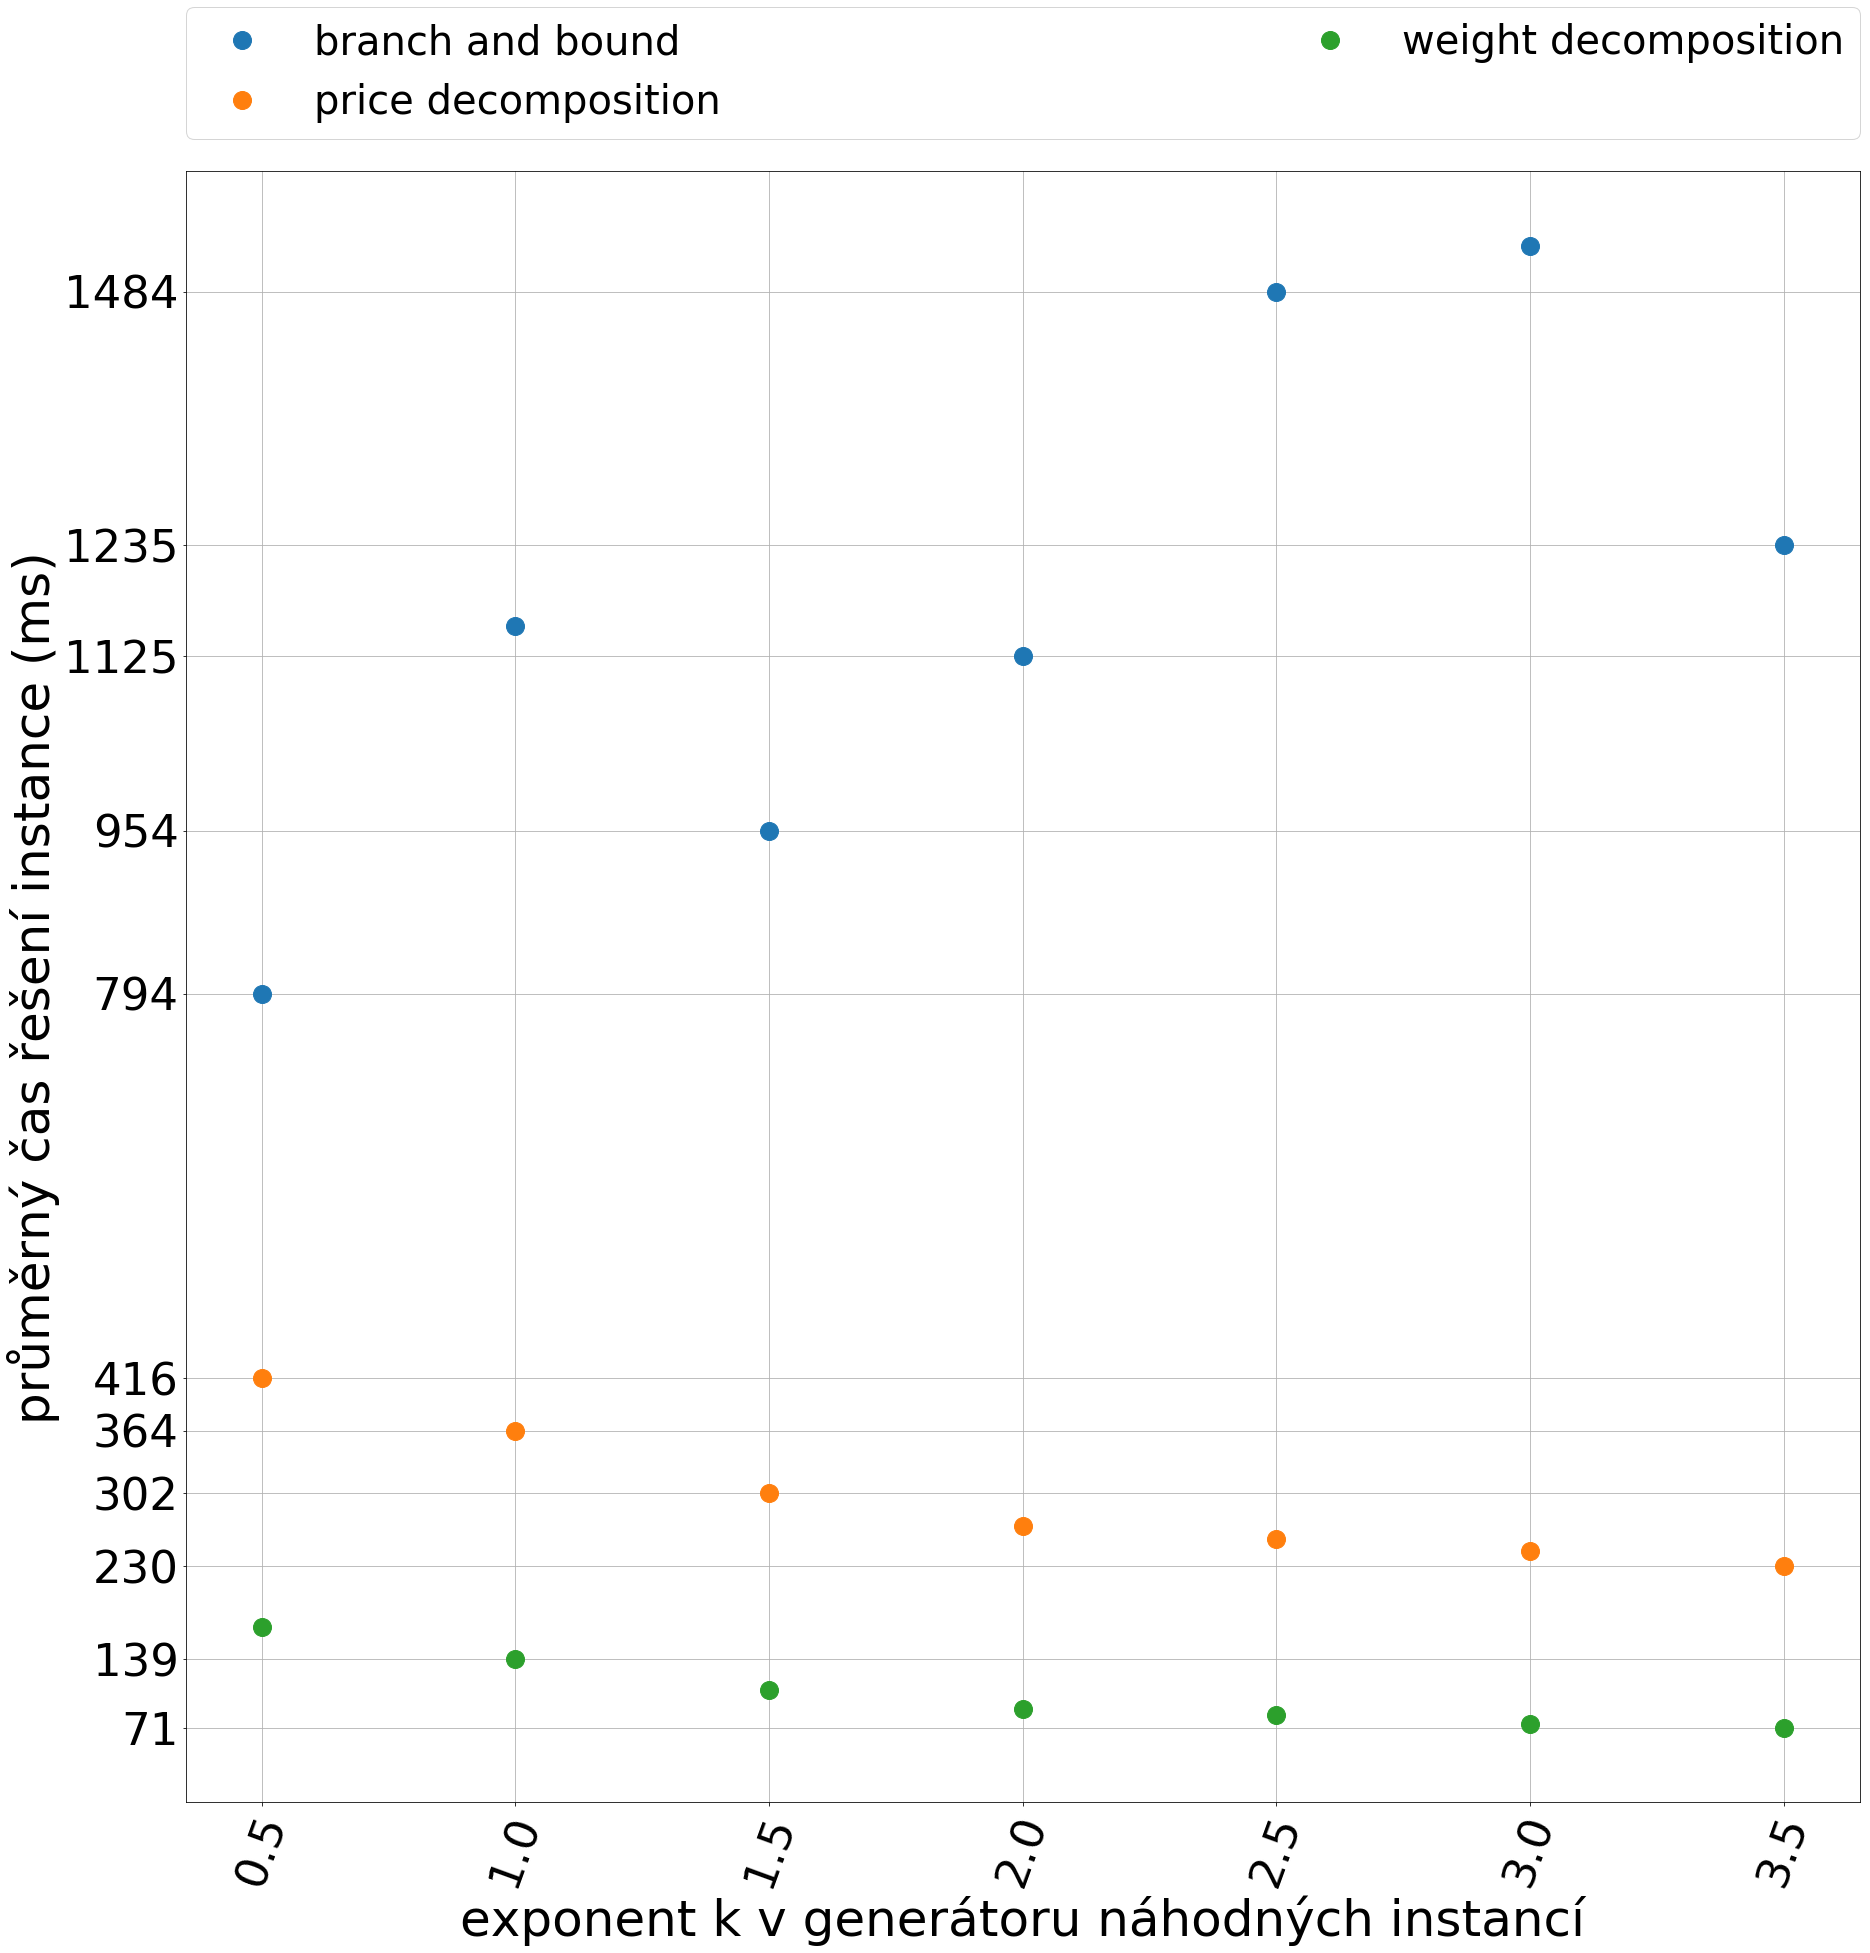

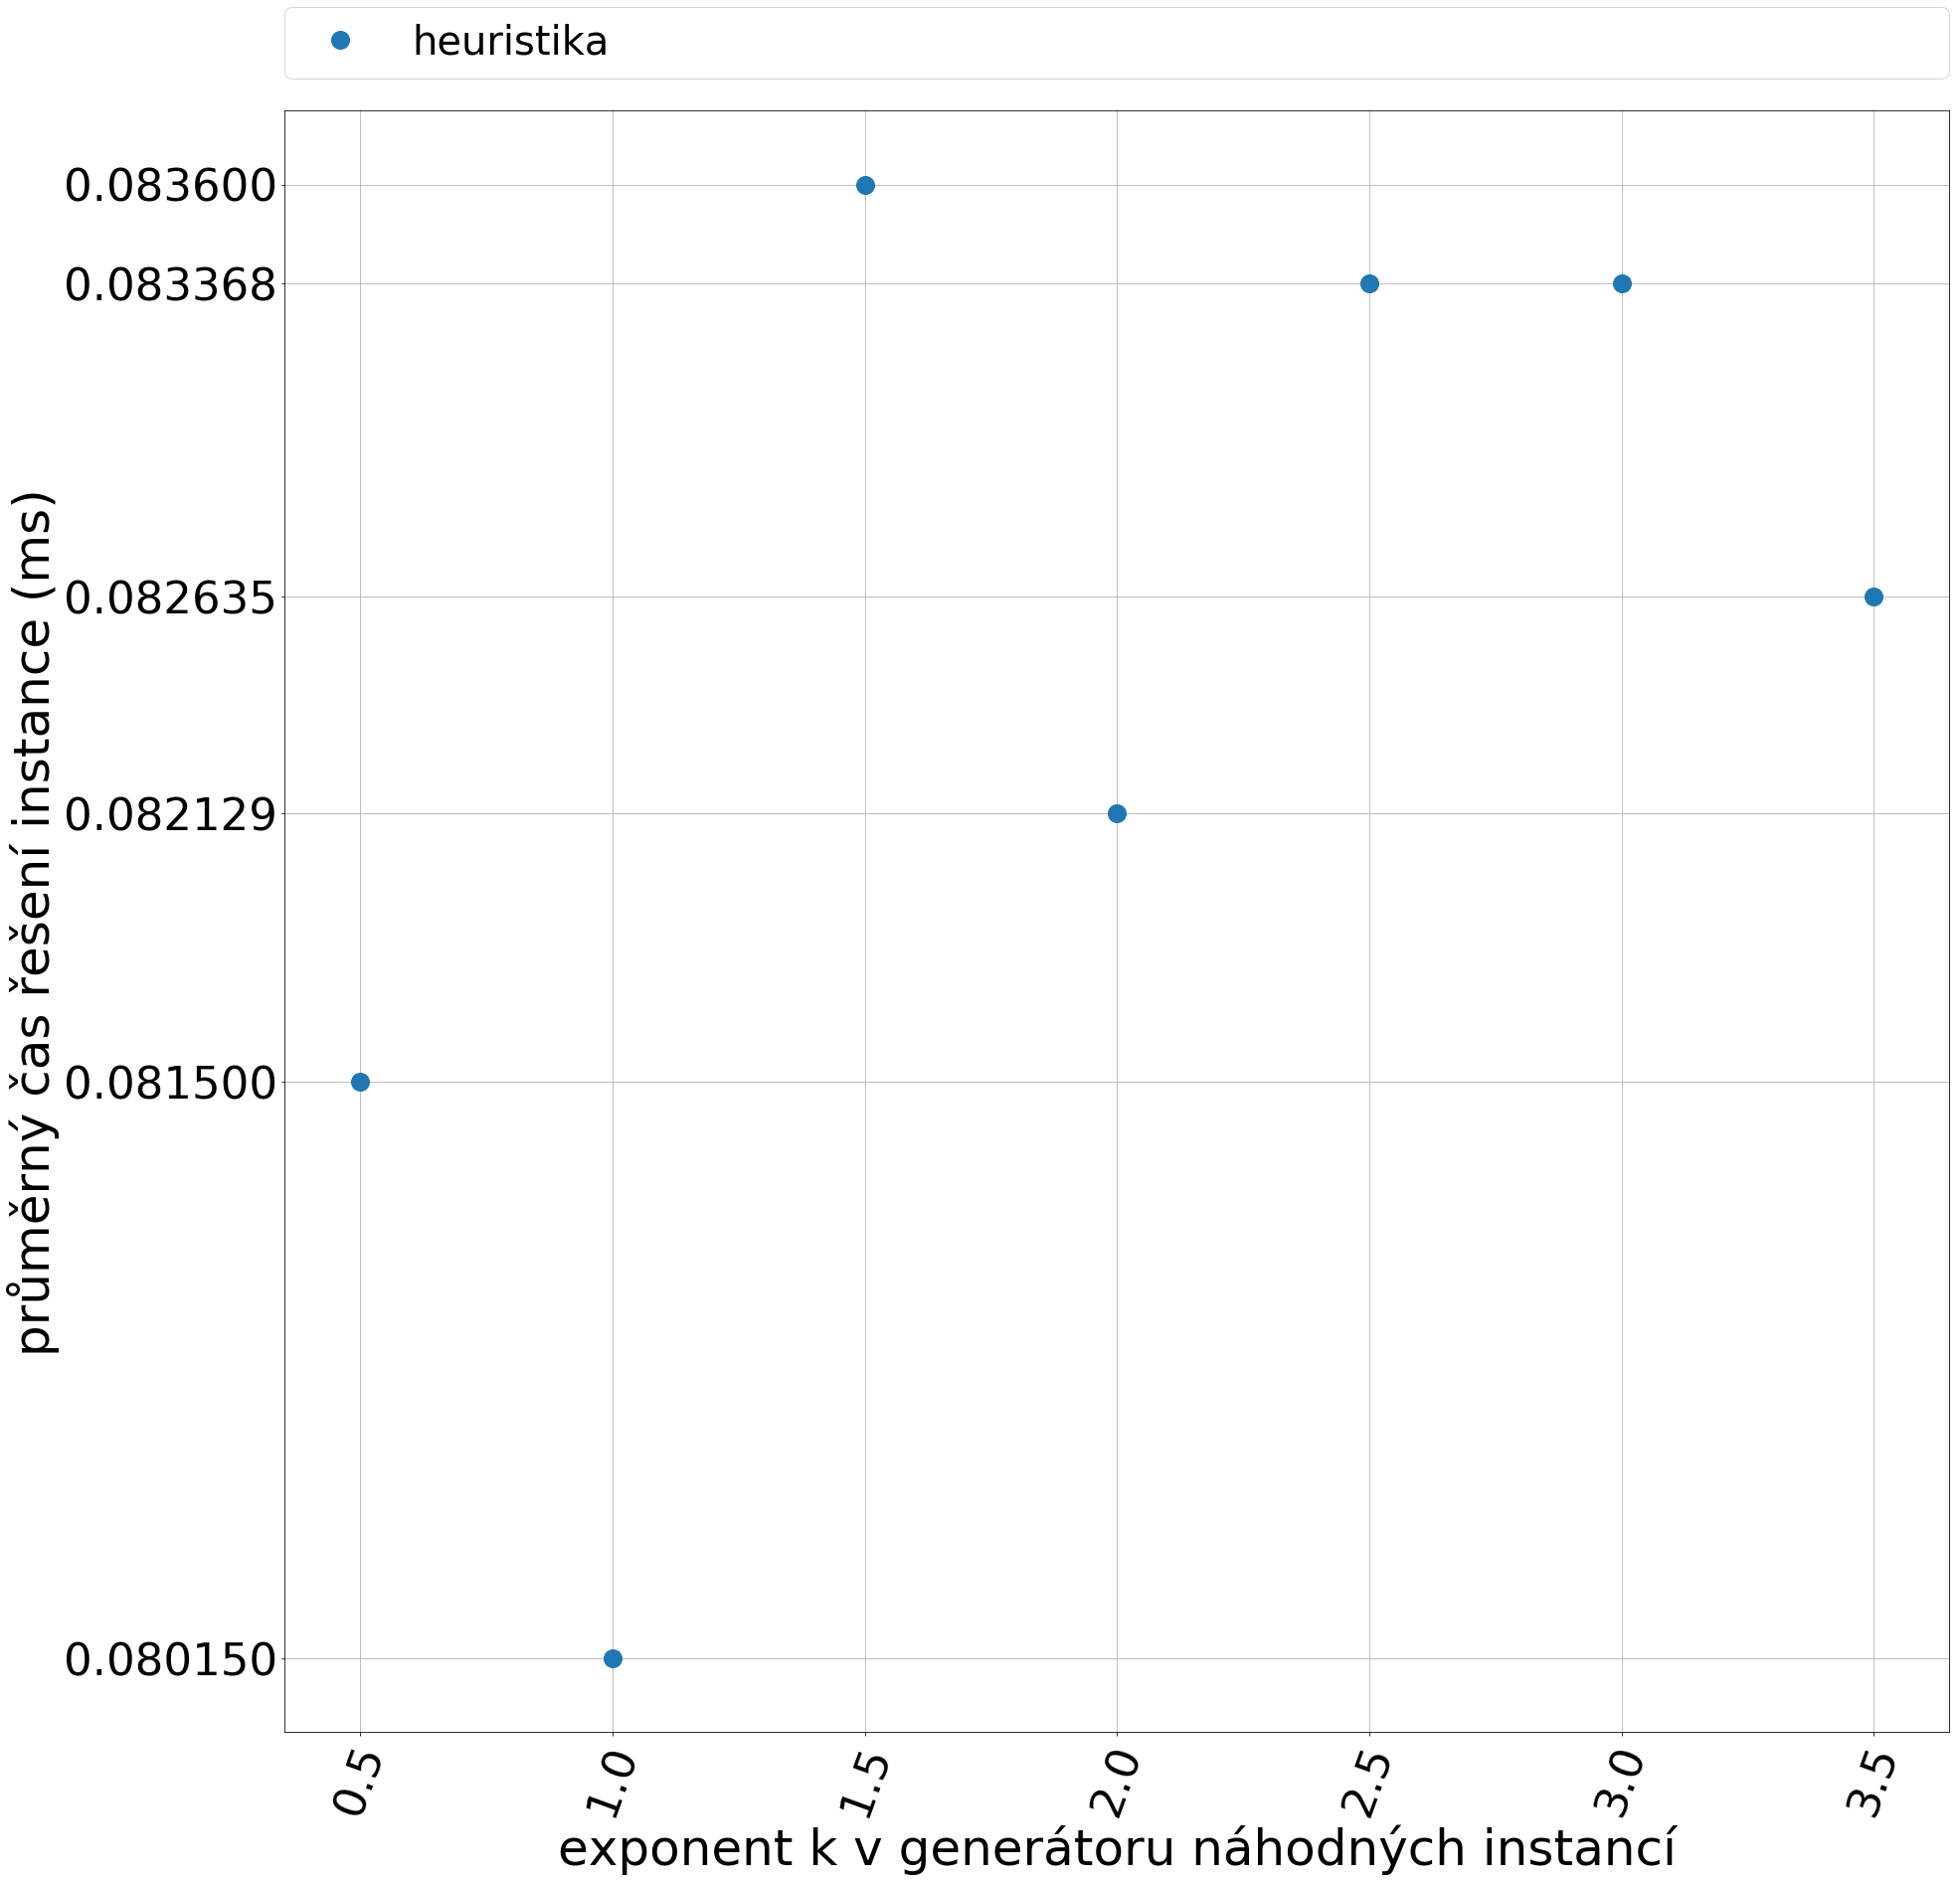

In [24]:
df = crate_data_frame(granM,['tH', 'tBB', 'tDC', 'tDW'], 10)

do_plot(30, 30, df.index, df[['tBB', 'tDC', 'tDW']], 
        "exponent k v generátoru náhodných instancí", "průměrný čas řešení instance (ms)", ['branch and bound', 'price decomposition', 'weight decomposition'], 
        "GME.pdf", 30, 1)
do_plot(30, 30, df.index, df[['tH']], 
        "exponent k v generátoru náhodných instancí", "průměrný čas řešení instance (ms)", ['heuristika'], 
        "GMH.pdf", 400, 1)

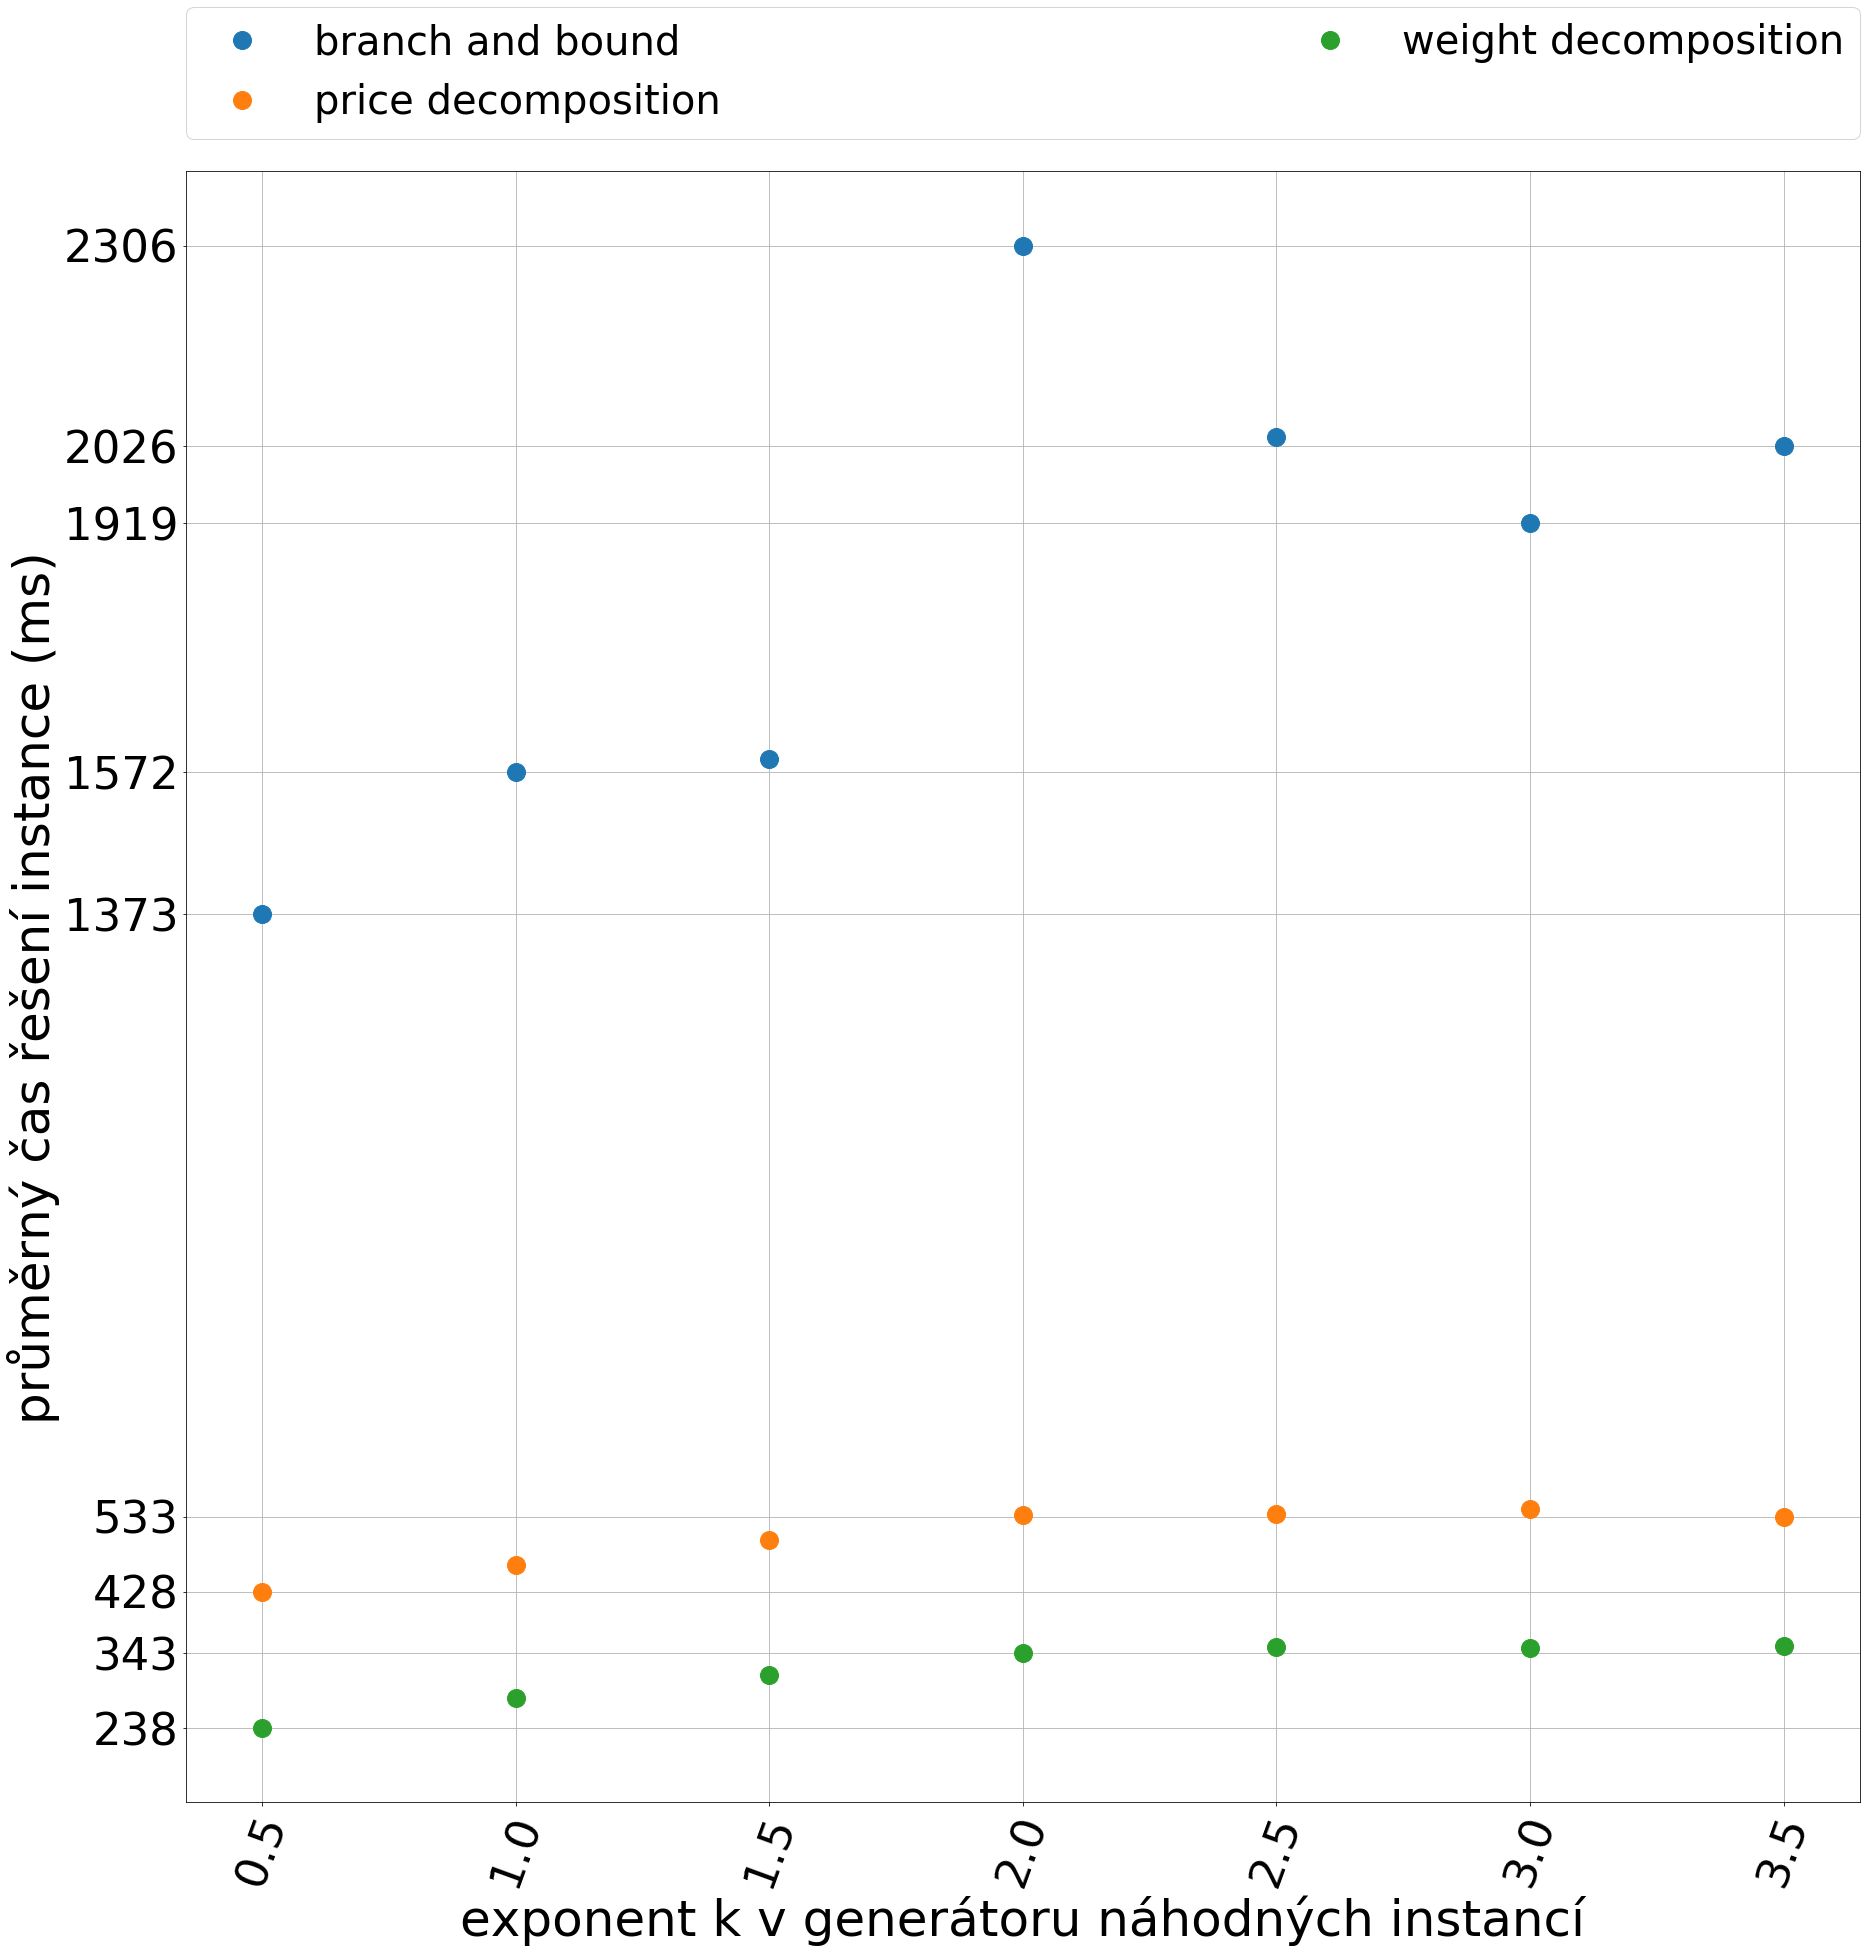

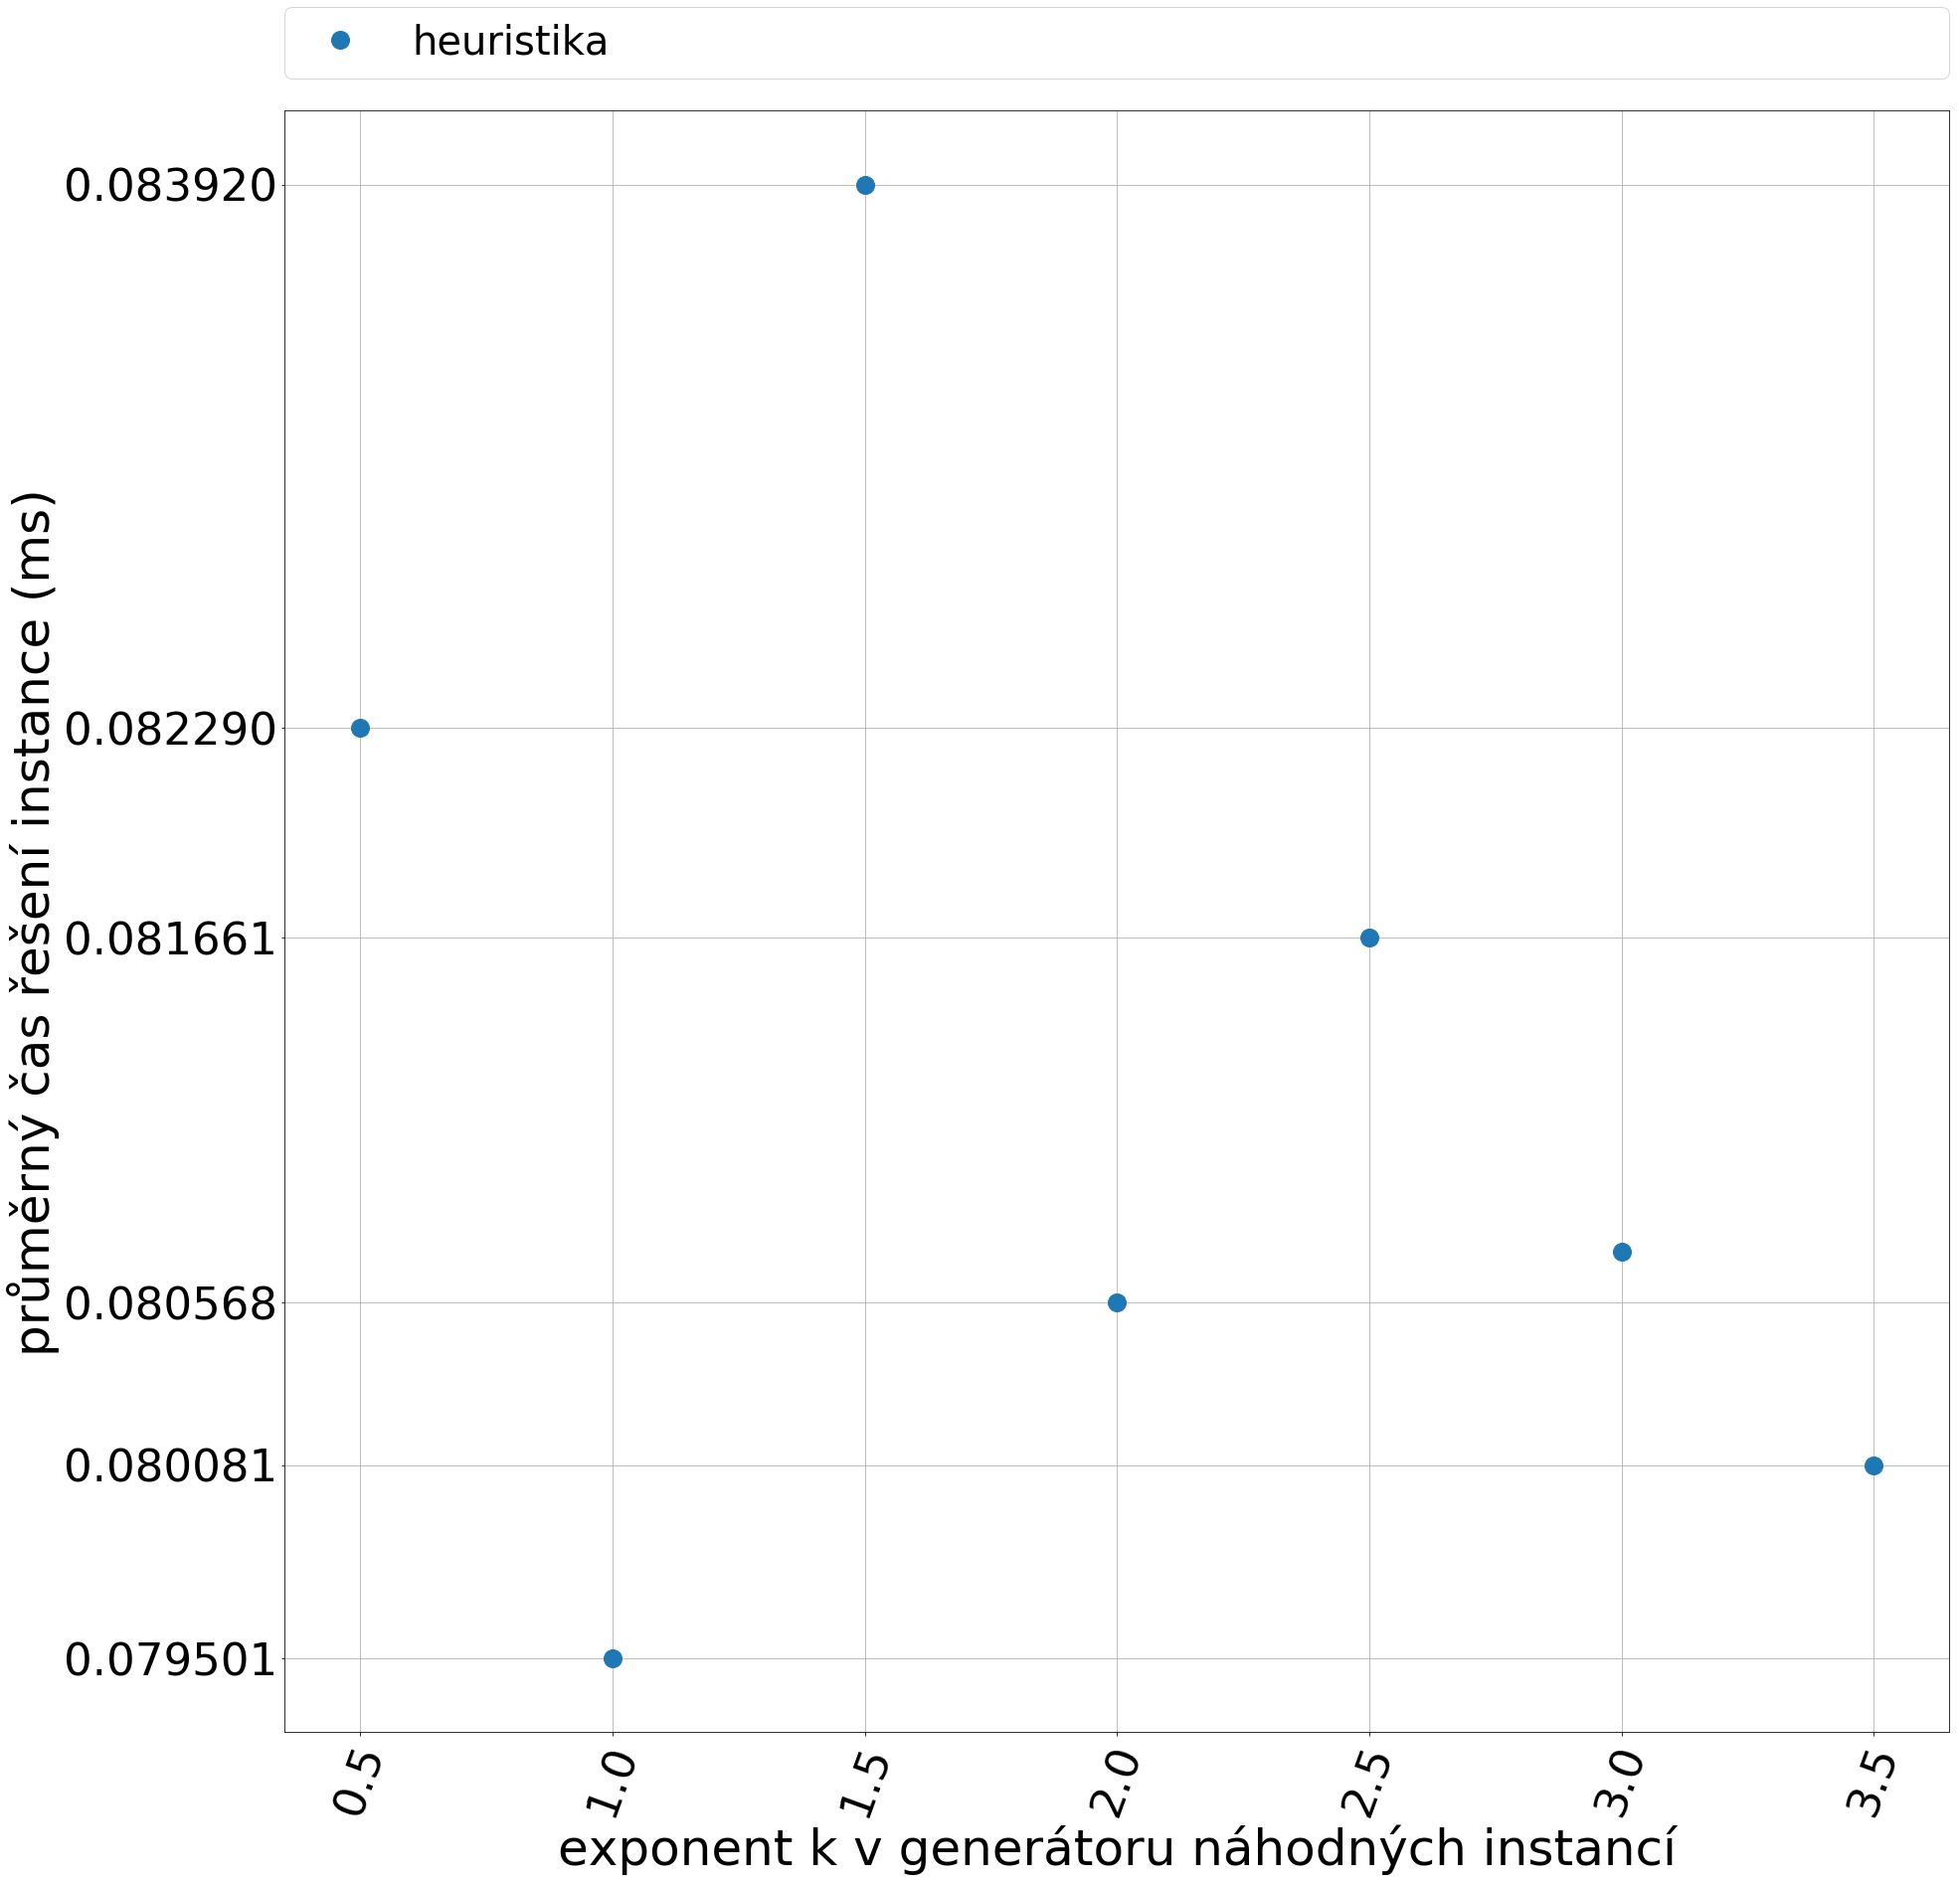

In [23]:
df = crate_data_frame(granV,['tH', 'tBB', 'tDC', 'tDW'], 10)

do_plot(30, 30, df.index, df[['tBB', 'tDC', 'tDW']], 
        "exponent k v generátoru náhodných instancí", "průměrný čas řešení instance (ms)", ['branch and bound', 'price decomposition', 'weight decomposition'], 
        "GVE.pdf", 30, 1)
do_plot(30, 30, df.index, df[['tH']], 
        "exponent k v generátoru náhodných instancí", "průměrný čas řešení instance (ms)", ['heuristika'], 
        "GVH.pdf", 200, 1)

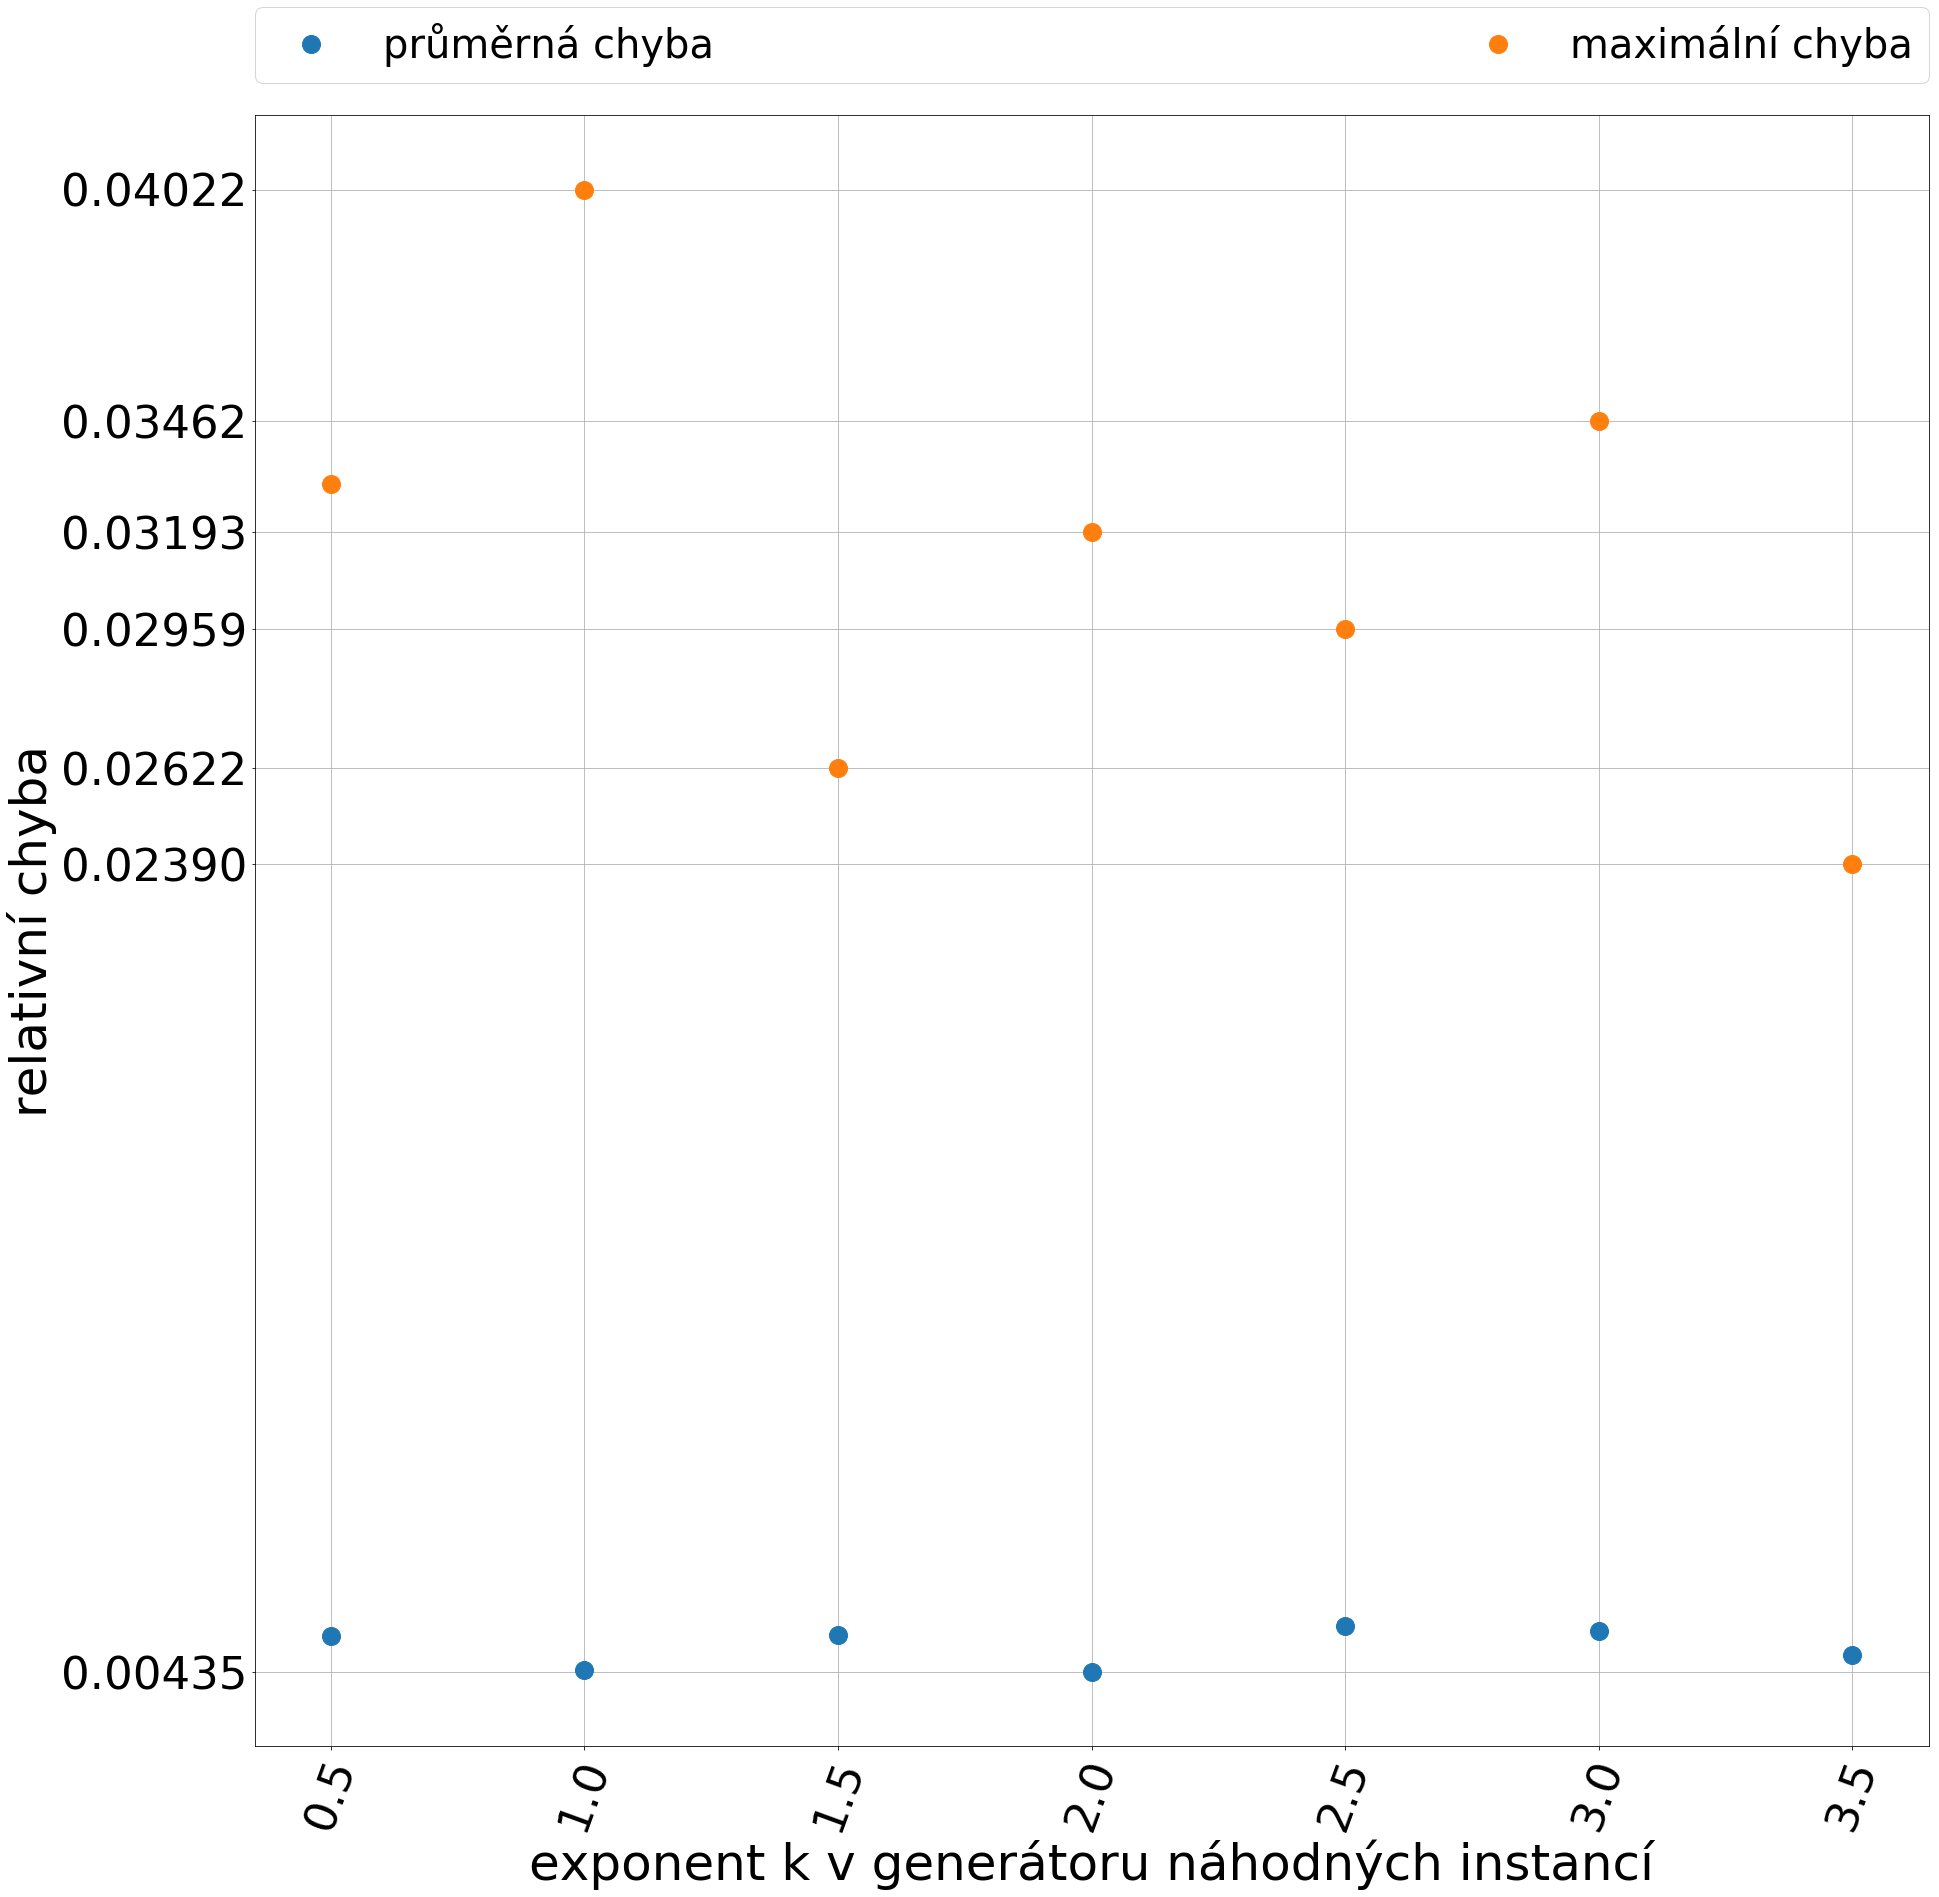

In [9]:
df = crate_data_frame(granV,
                      ['errH'], 10, True)
dM = crate_data_frame(granV,
                      ['errH'], 10, False)
df.columns = ['avgE']
dM.columns = ['maxE']
df['maxE'] = dM['maxE']


do_plot(30, 30, df.index, df[['avgE', 'maxE']], 
        "exponent k v generátoru náhodných instancí", "relativní chyba", ['průměrná chyba', 'maximální chyba'], 
        "GVHE.pdf",30 , 1)

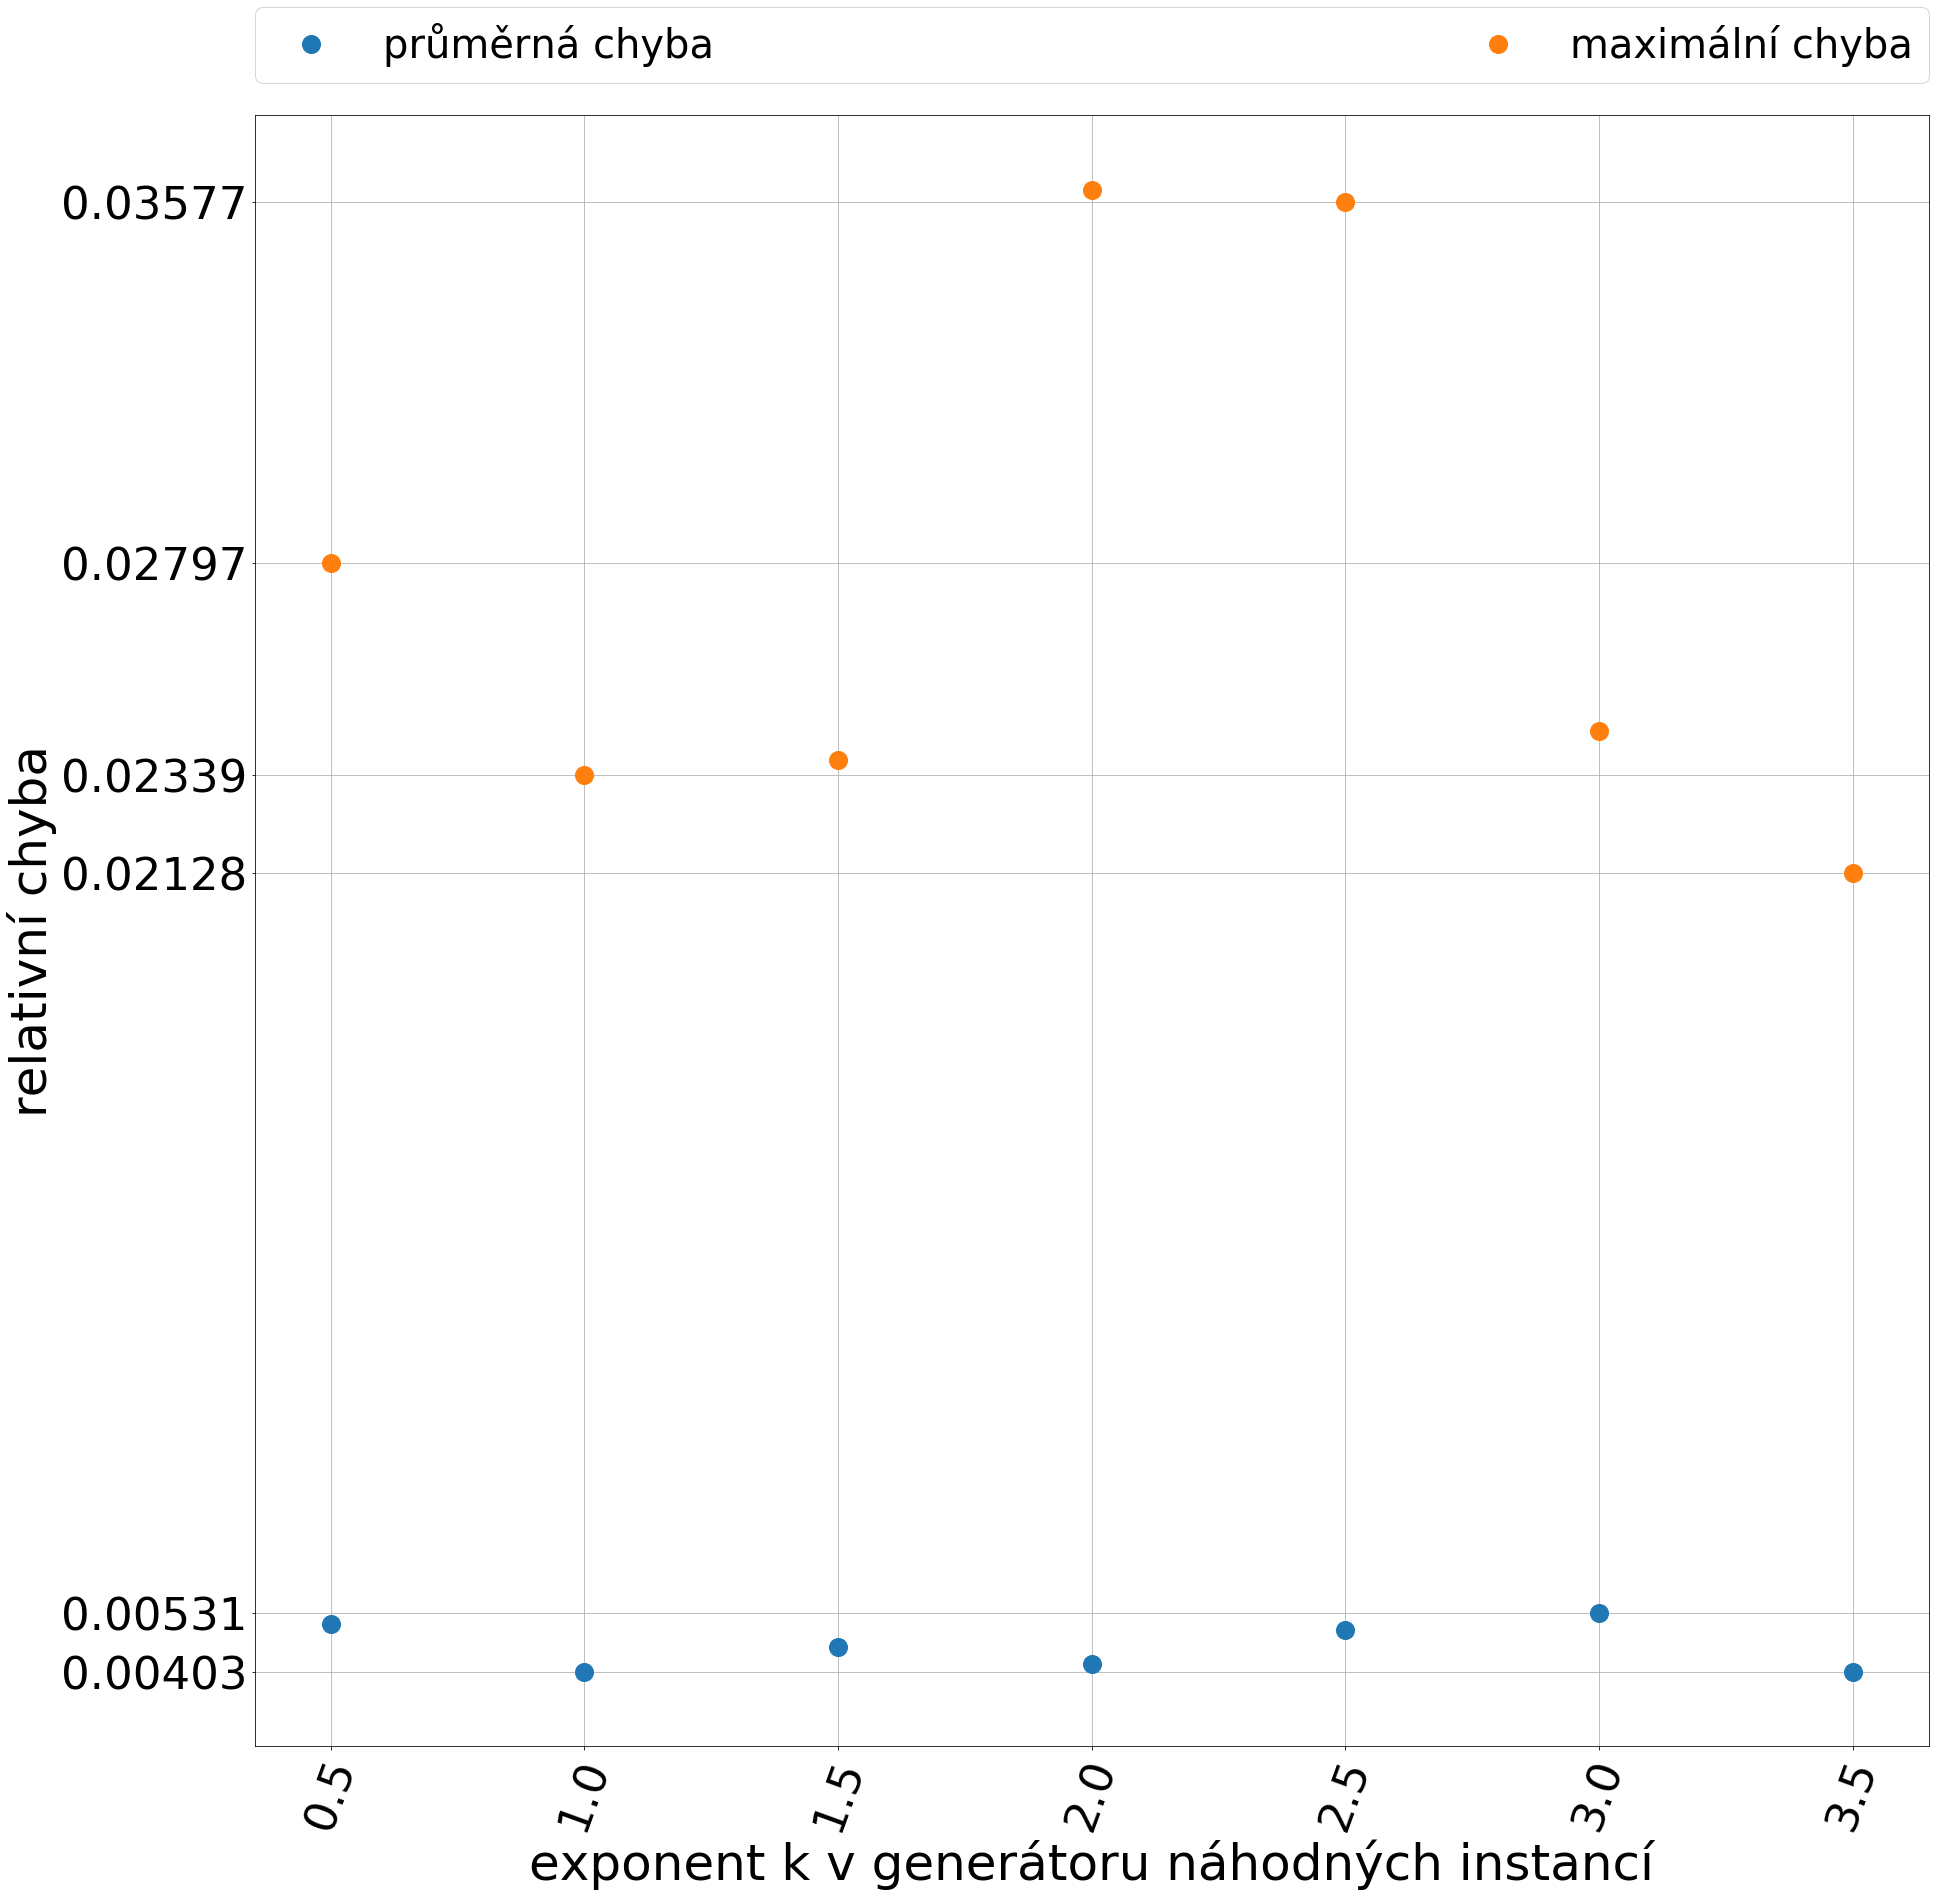

In [10]:
df = crate_data_frame(granM,['errH'], 10, True)
dM = crate_data_frame(granM,['errH'], 10, False)
df.columns = ['avgE']
dM.columns = ['maxE']
df['maxE'] = dM['maxE']


do_plot(30, 30, df.index, df[['avgE', 'maxE']], 
        "exponent k v generátoru náhodných instancí", "relativní chyba", ['průměrná chyba', 'maximální chyba'], 
        "GMHE.pdf",30 , 1)

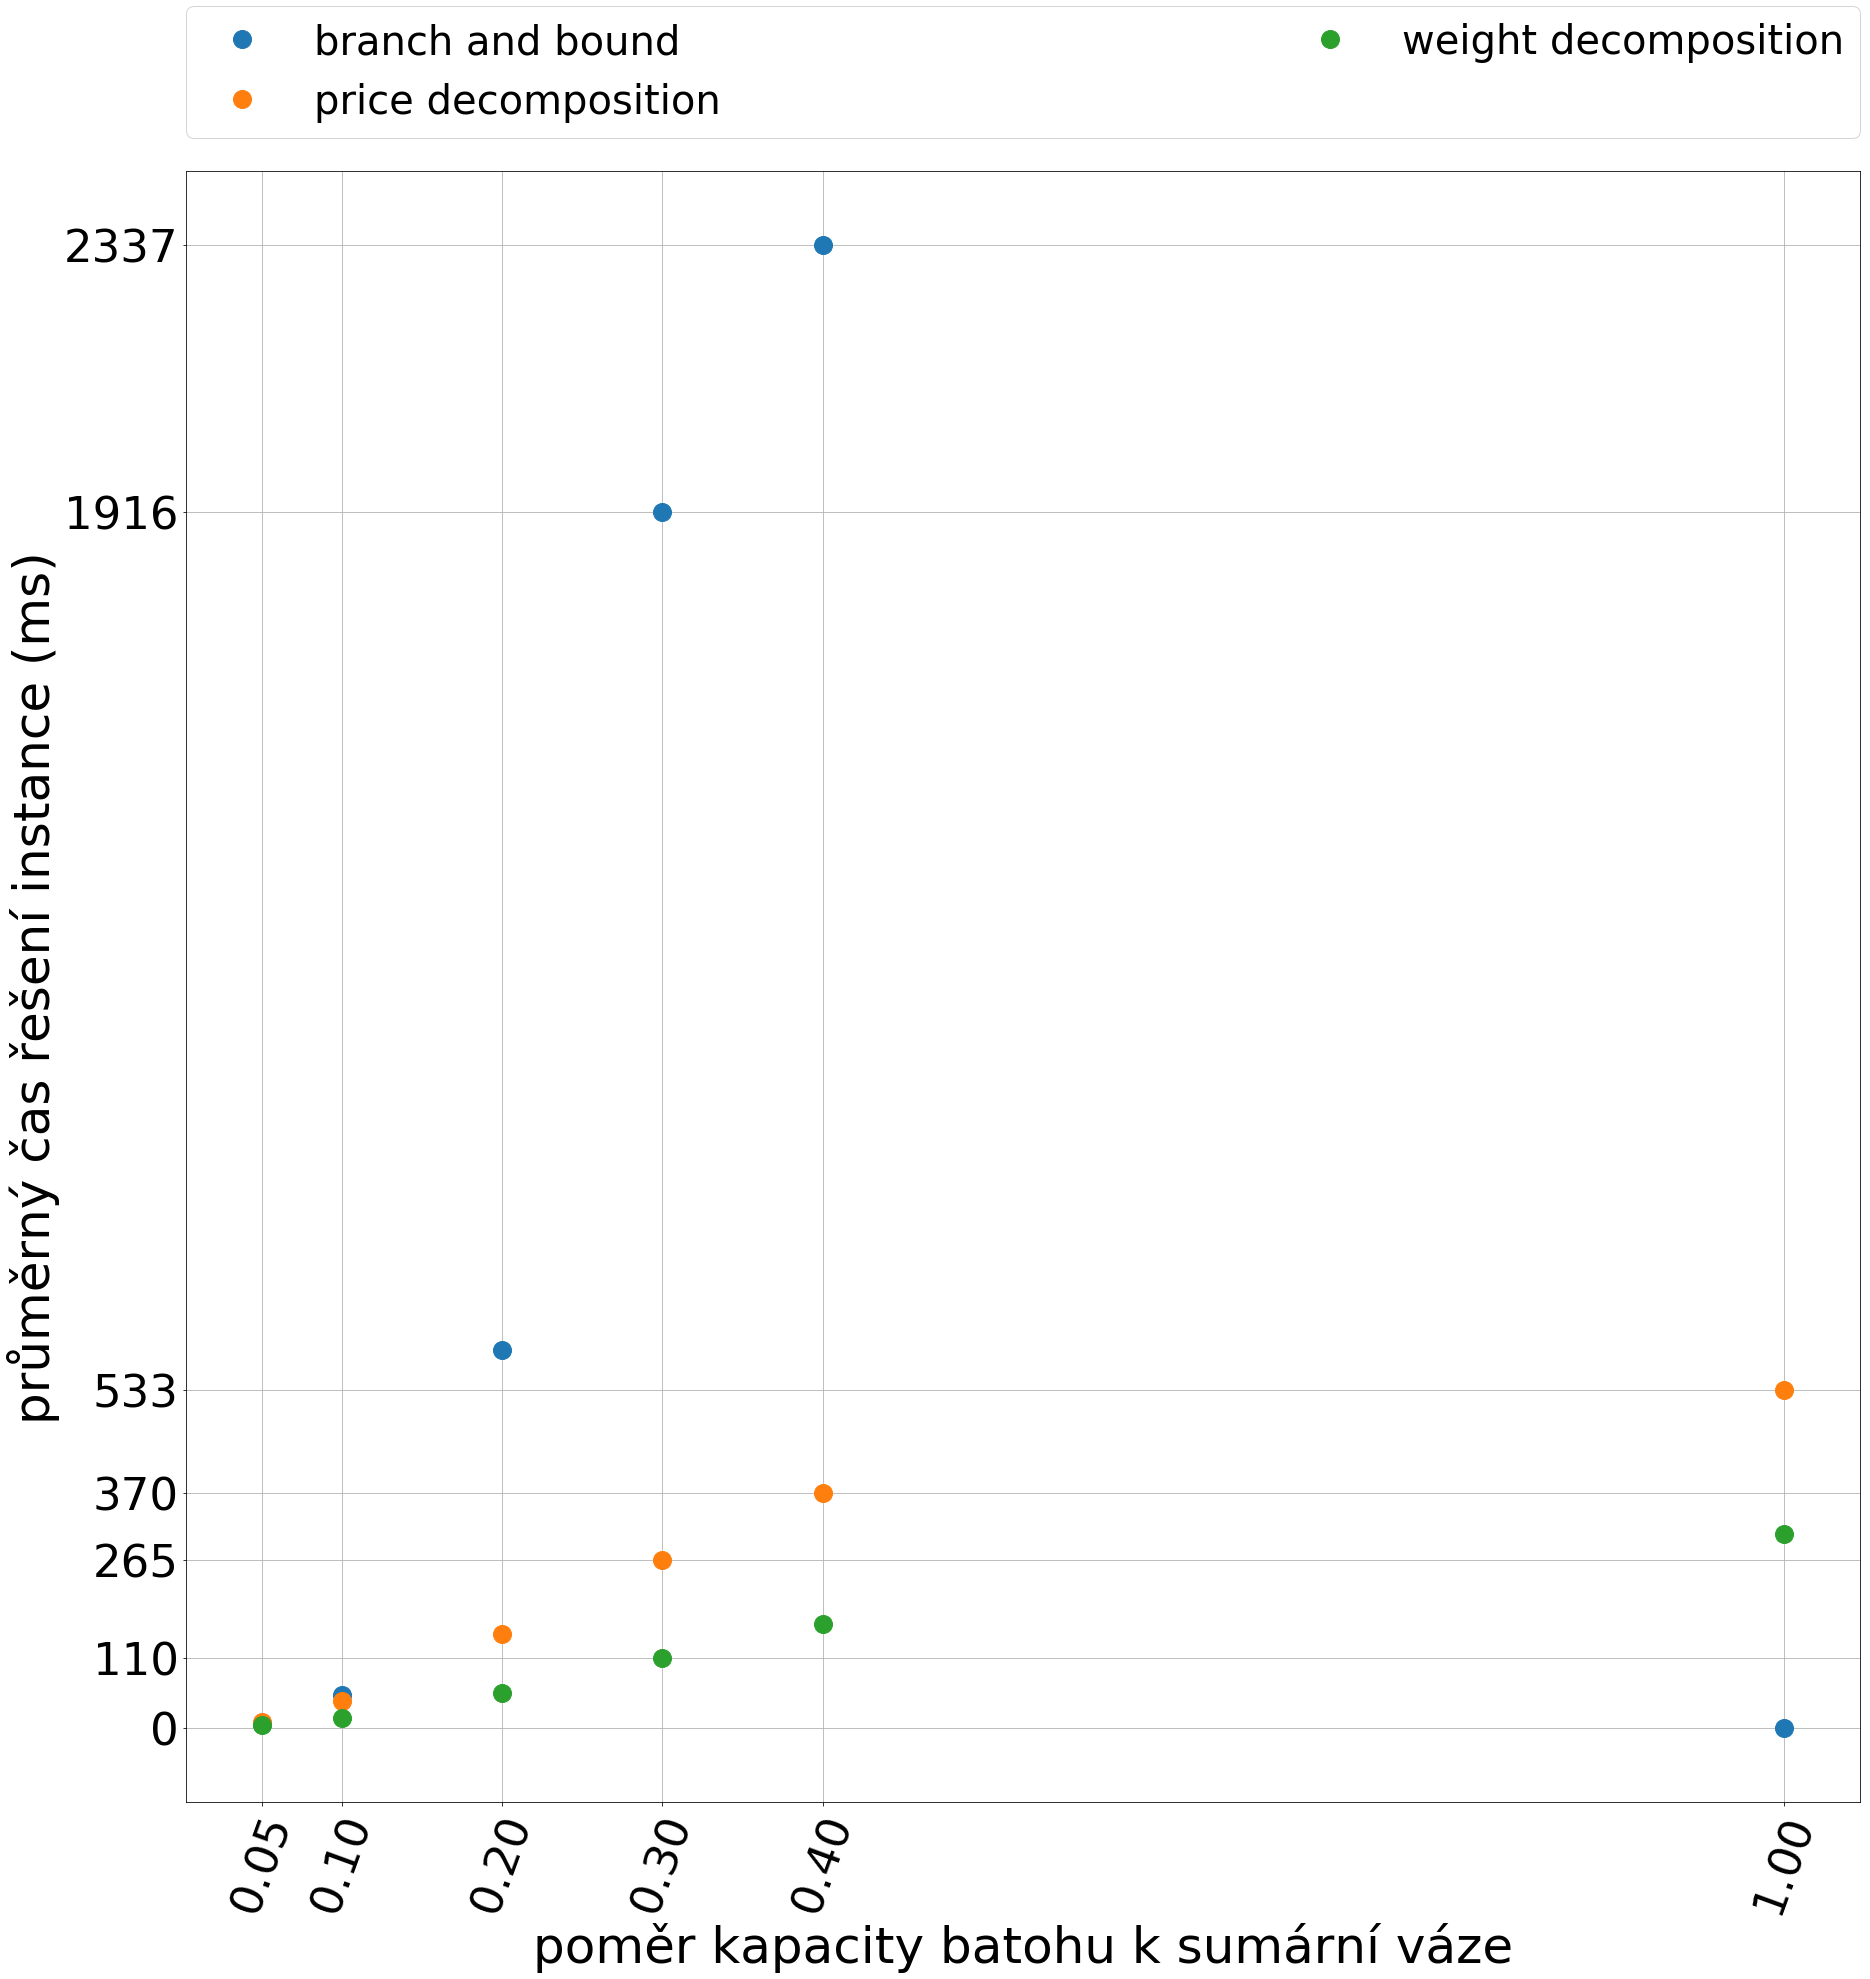

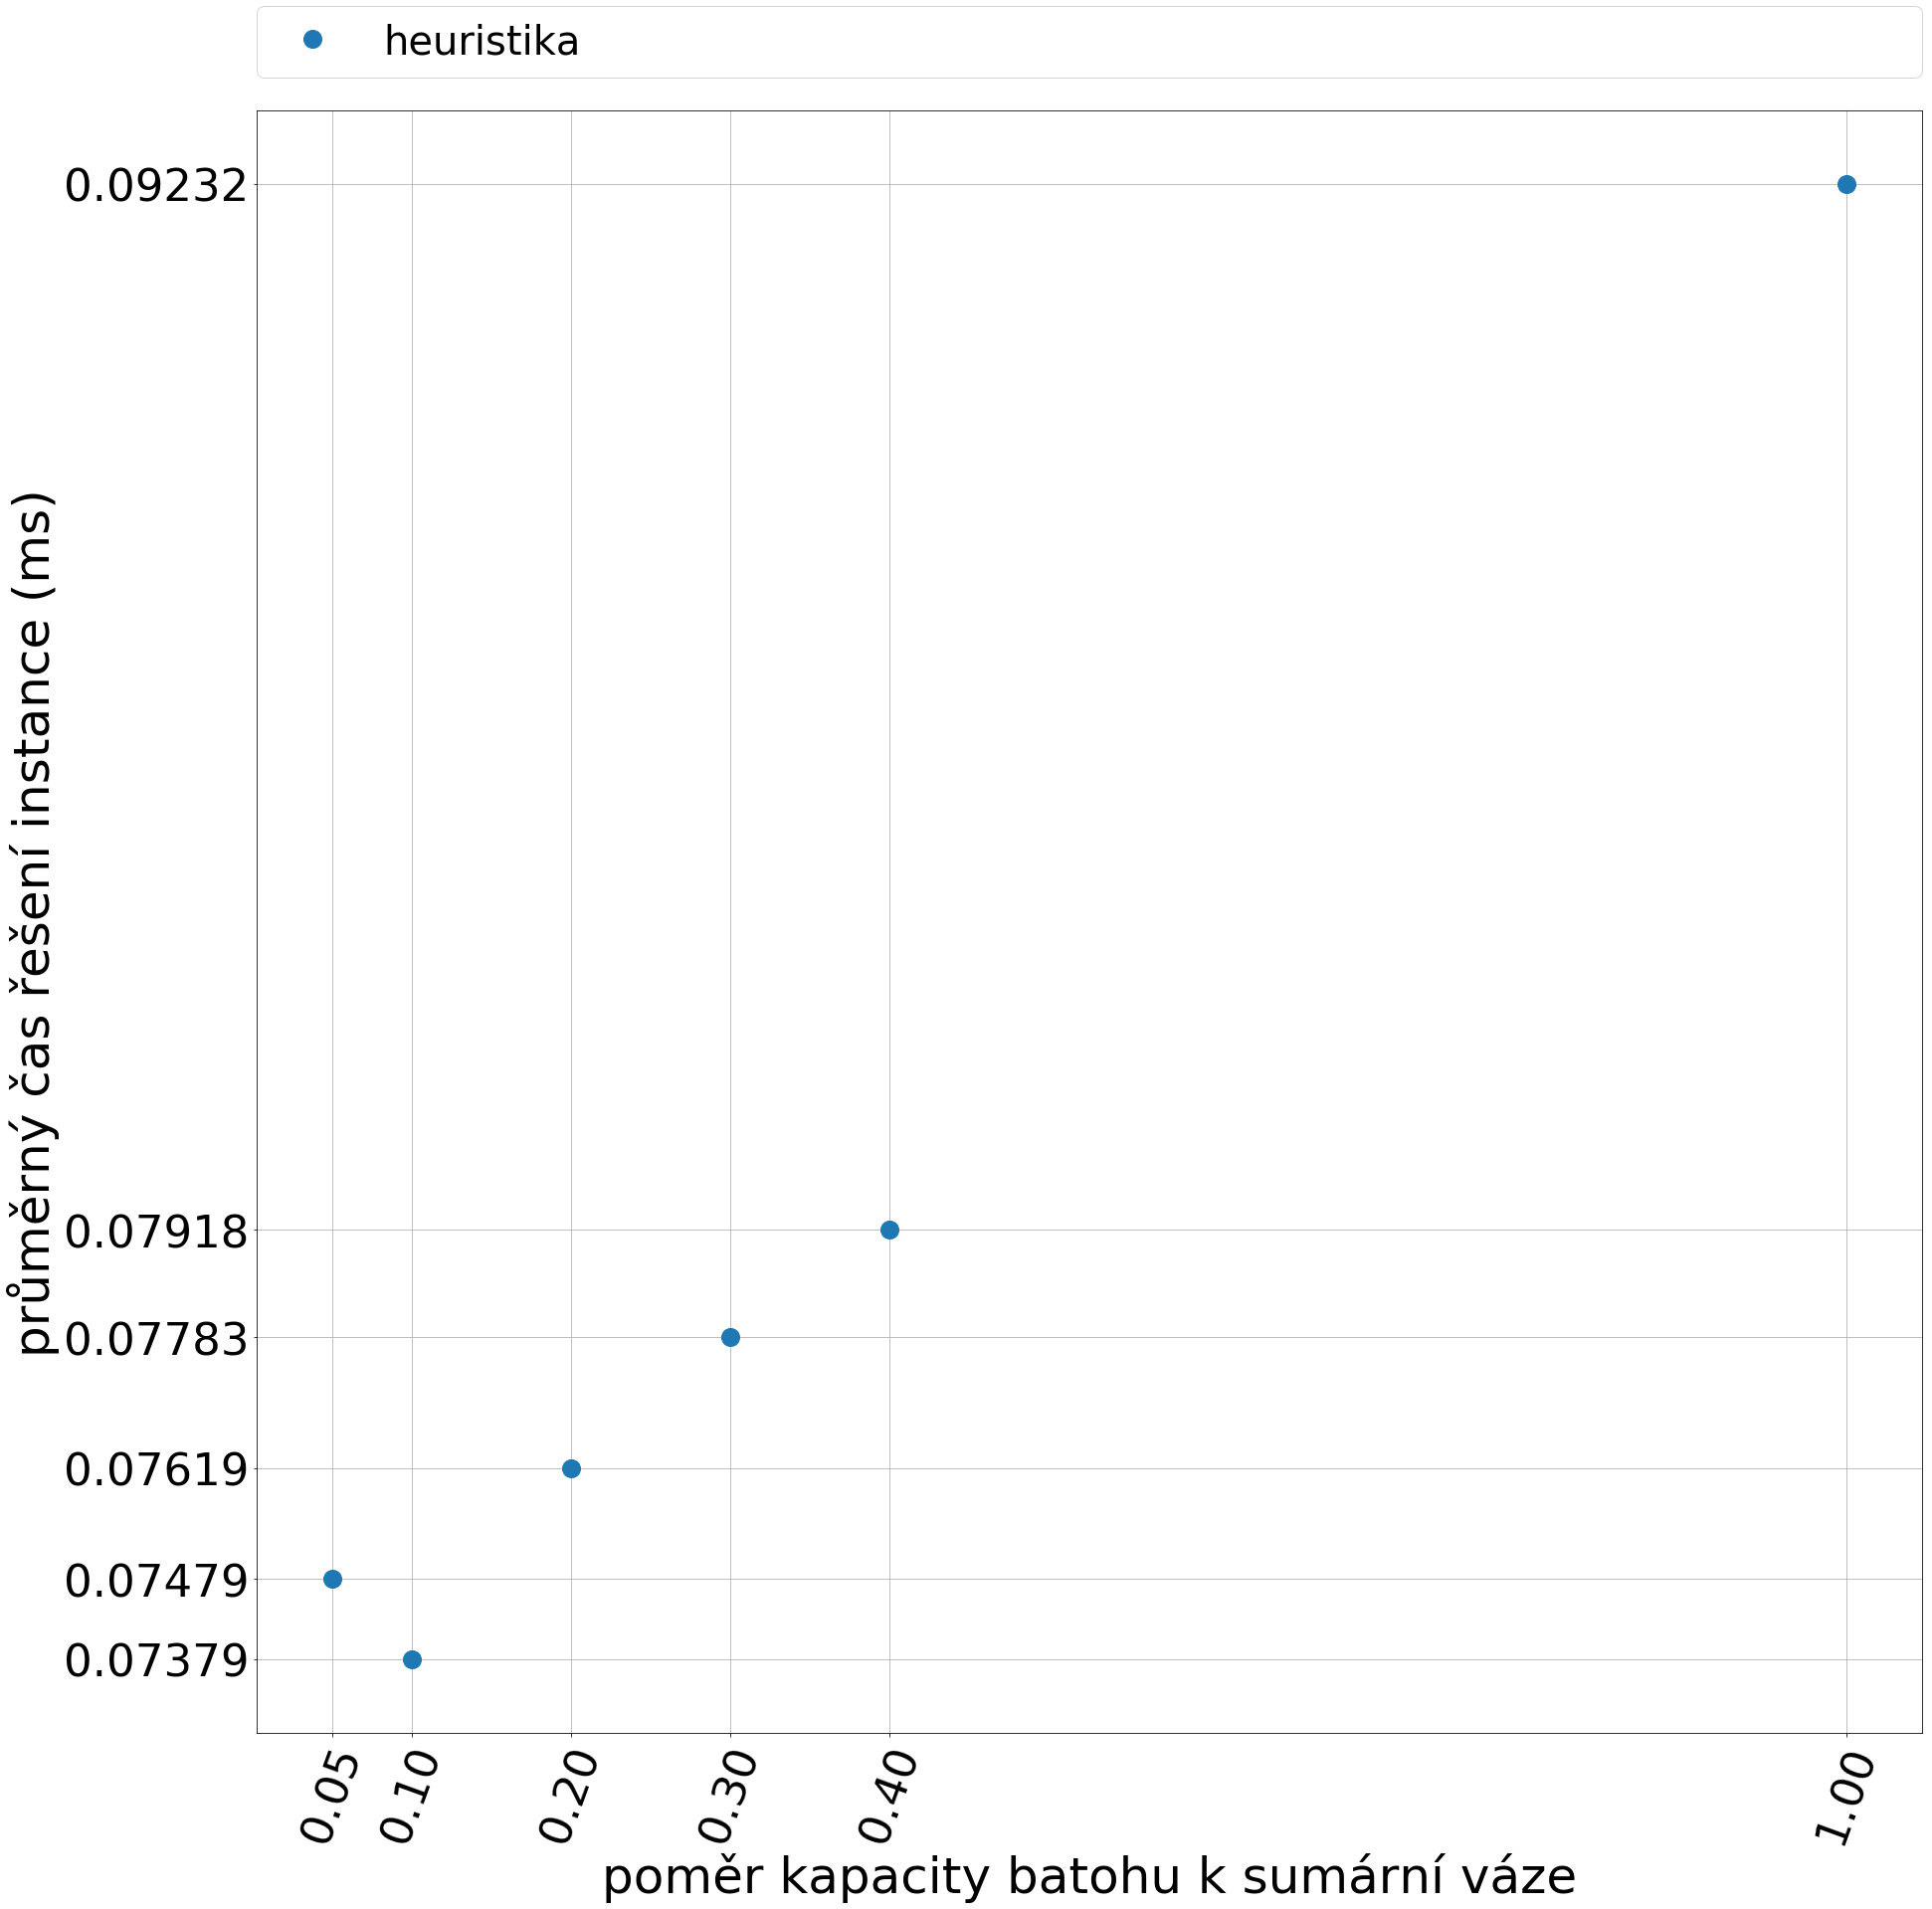

In [11]:
df = crate_data_frame(pomerM,['tH', 'tBB', 'tDC', 'tDW'], 100)

do_plot(30, 30, df.index, df[['tBB', 'tDC', 'tDW']], 
        "poměr kapacity batohu k sumární váze", "průměrný čas řešení instance (ms)", ['branch and bound', 'price decomposition', 'weight decomposition'], 
        "mE.pdf", 30, 1)
do_plot(30, 30, df.index, df[['tH']], 
        "poměr kapacity batohu k sumární váze", "průměrný čas řešení instance (ms)", ['heuristika'], 
        "mH.pdf", 100, 1)

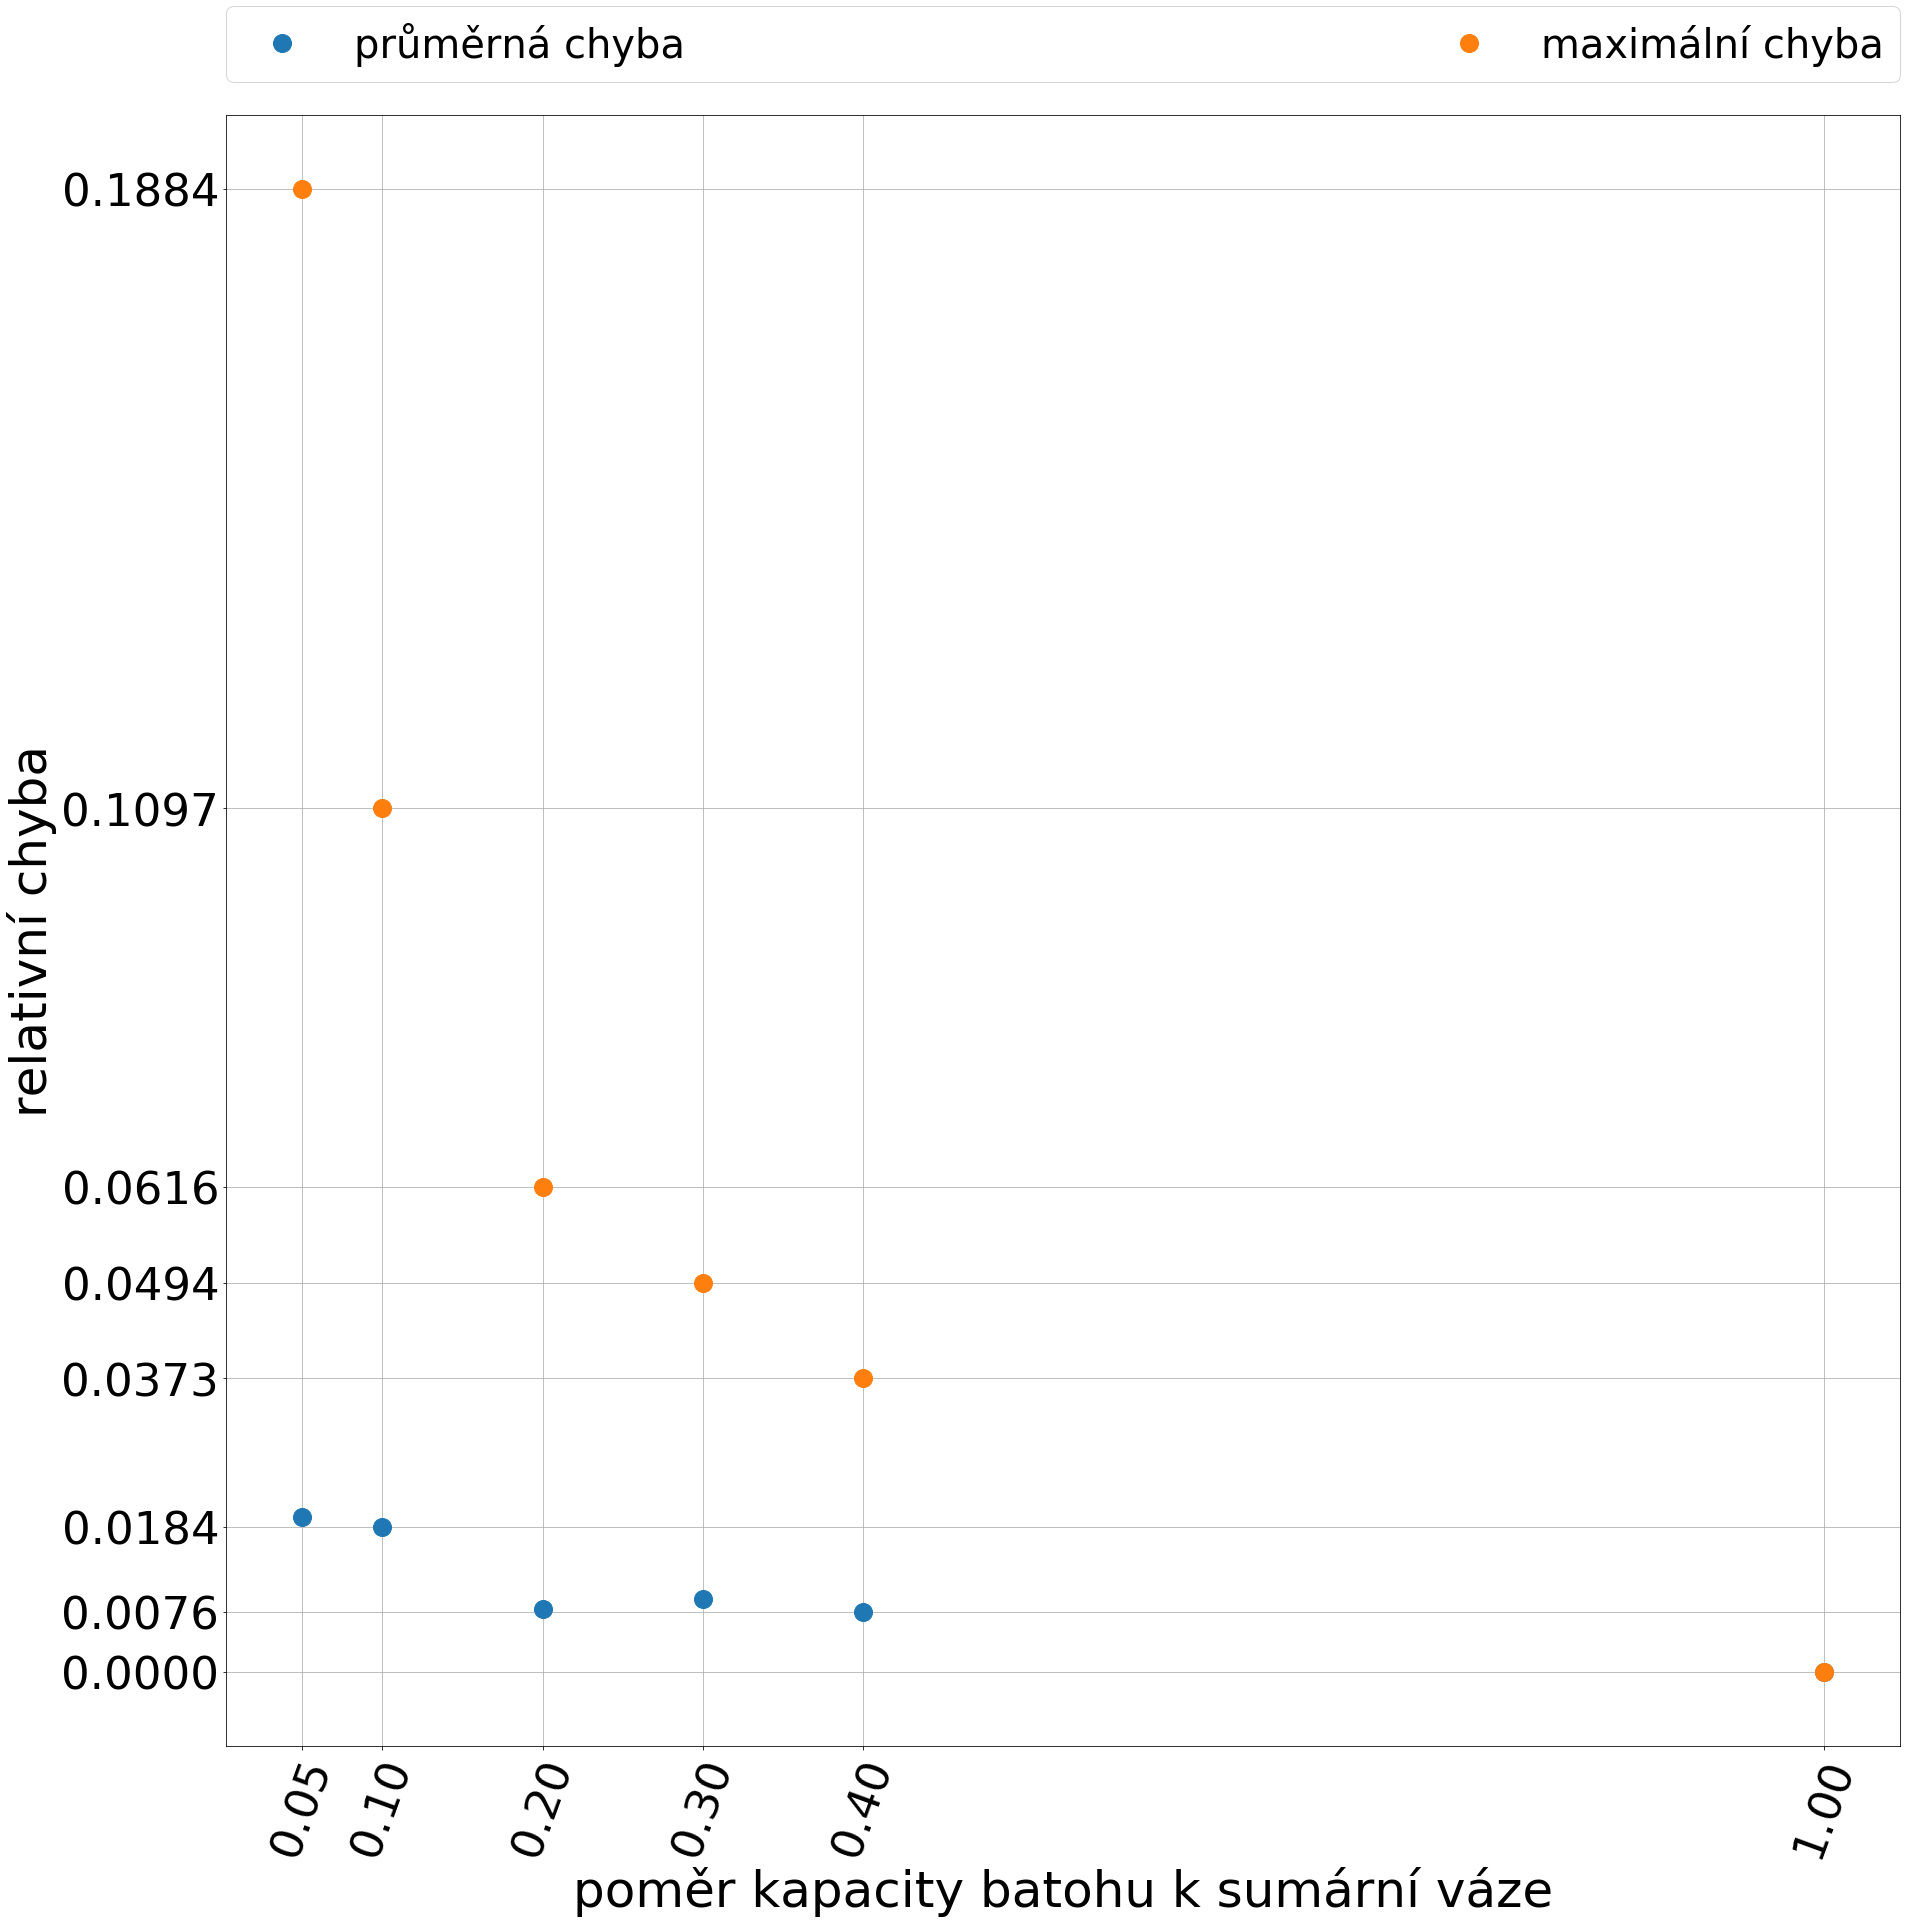

In [12]:
df = crate_data_frame(pomerM,['errH'], 100, True)
dM = crate_data_frame(pomerM,['errH'], 100, False)
df.columns = ['avgE']
dM.columns = ['maxE']
df['maxE'] = dM['maxE']


do_plot(30, 30, df.index, df[['avgE', 'maxE']], 
        "poměr kapacity batohu k sumární váze", "relativní chyba", ['průměrná chyba', 'maximální chyba'], 
        "mHE.pdf",30 , 1)

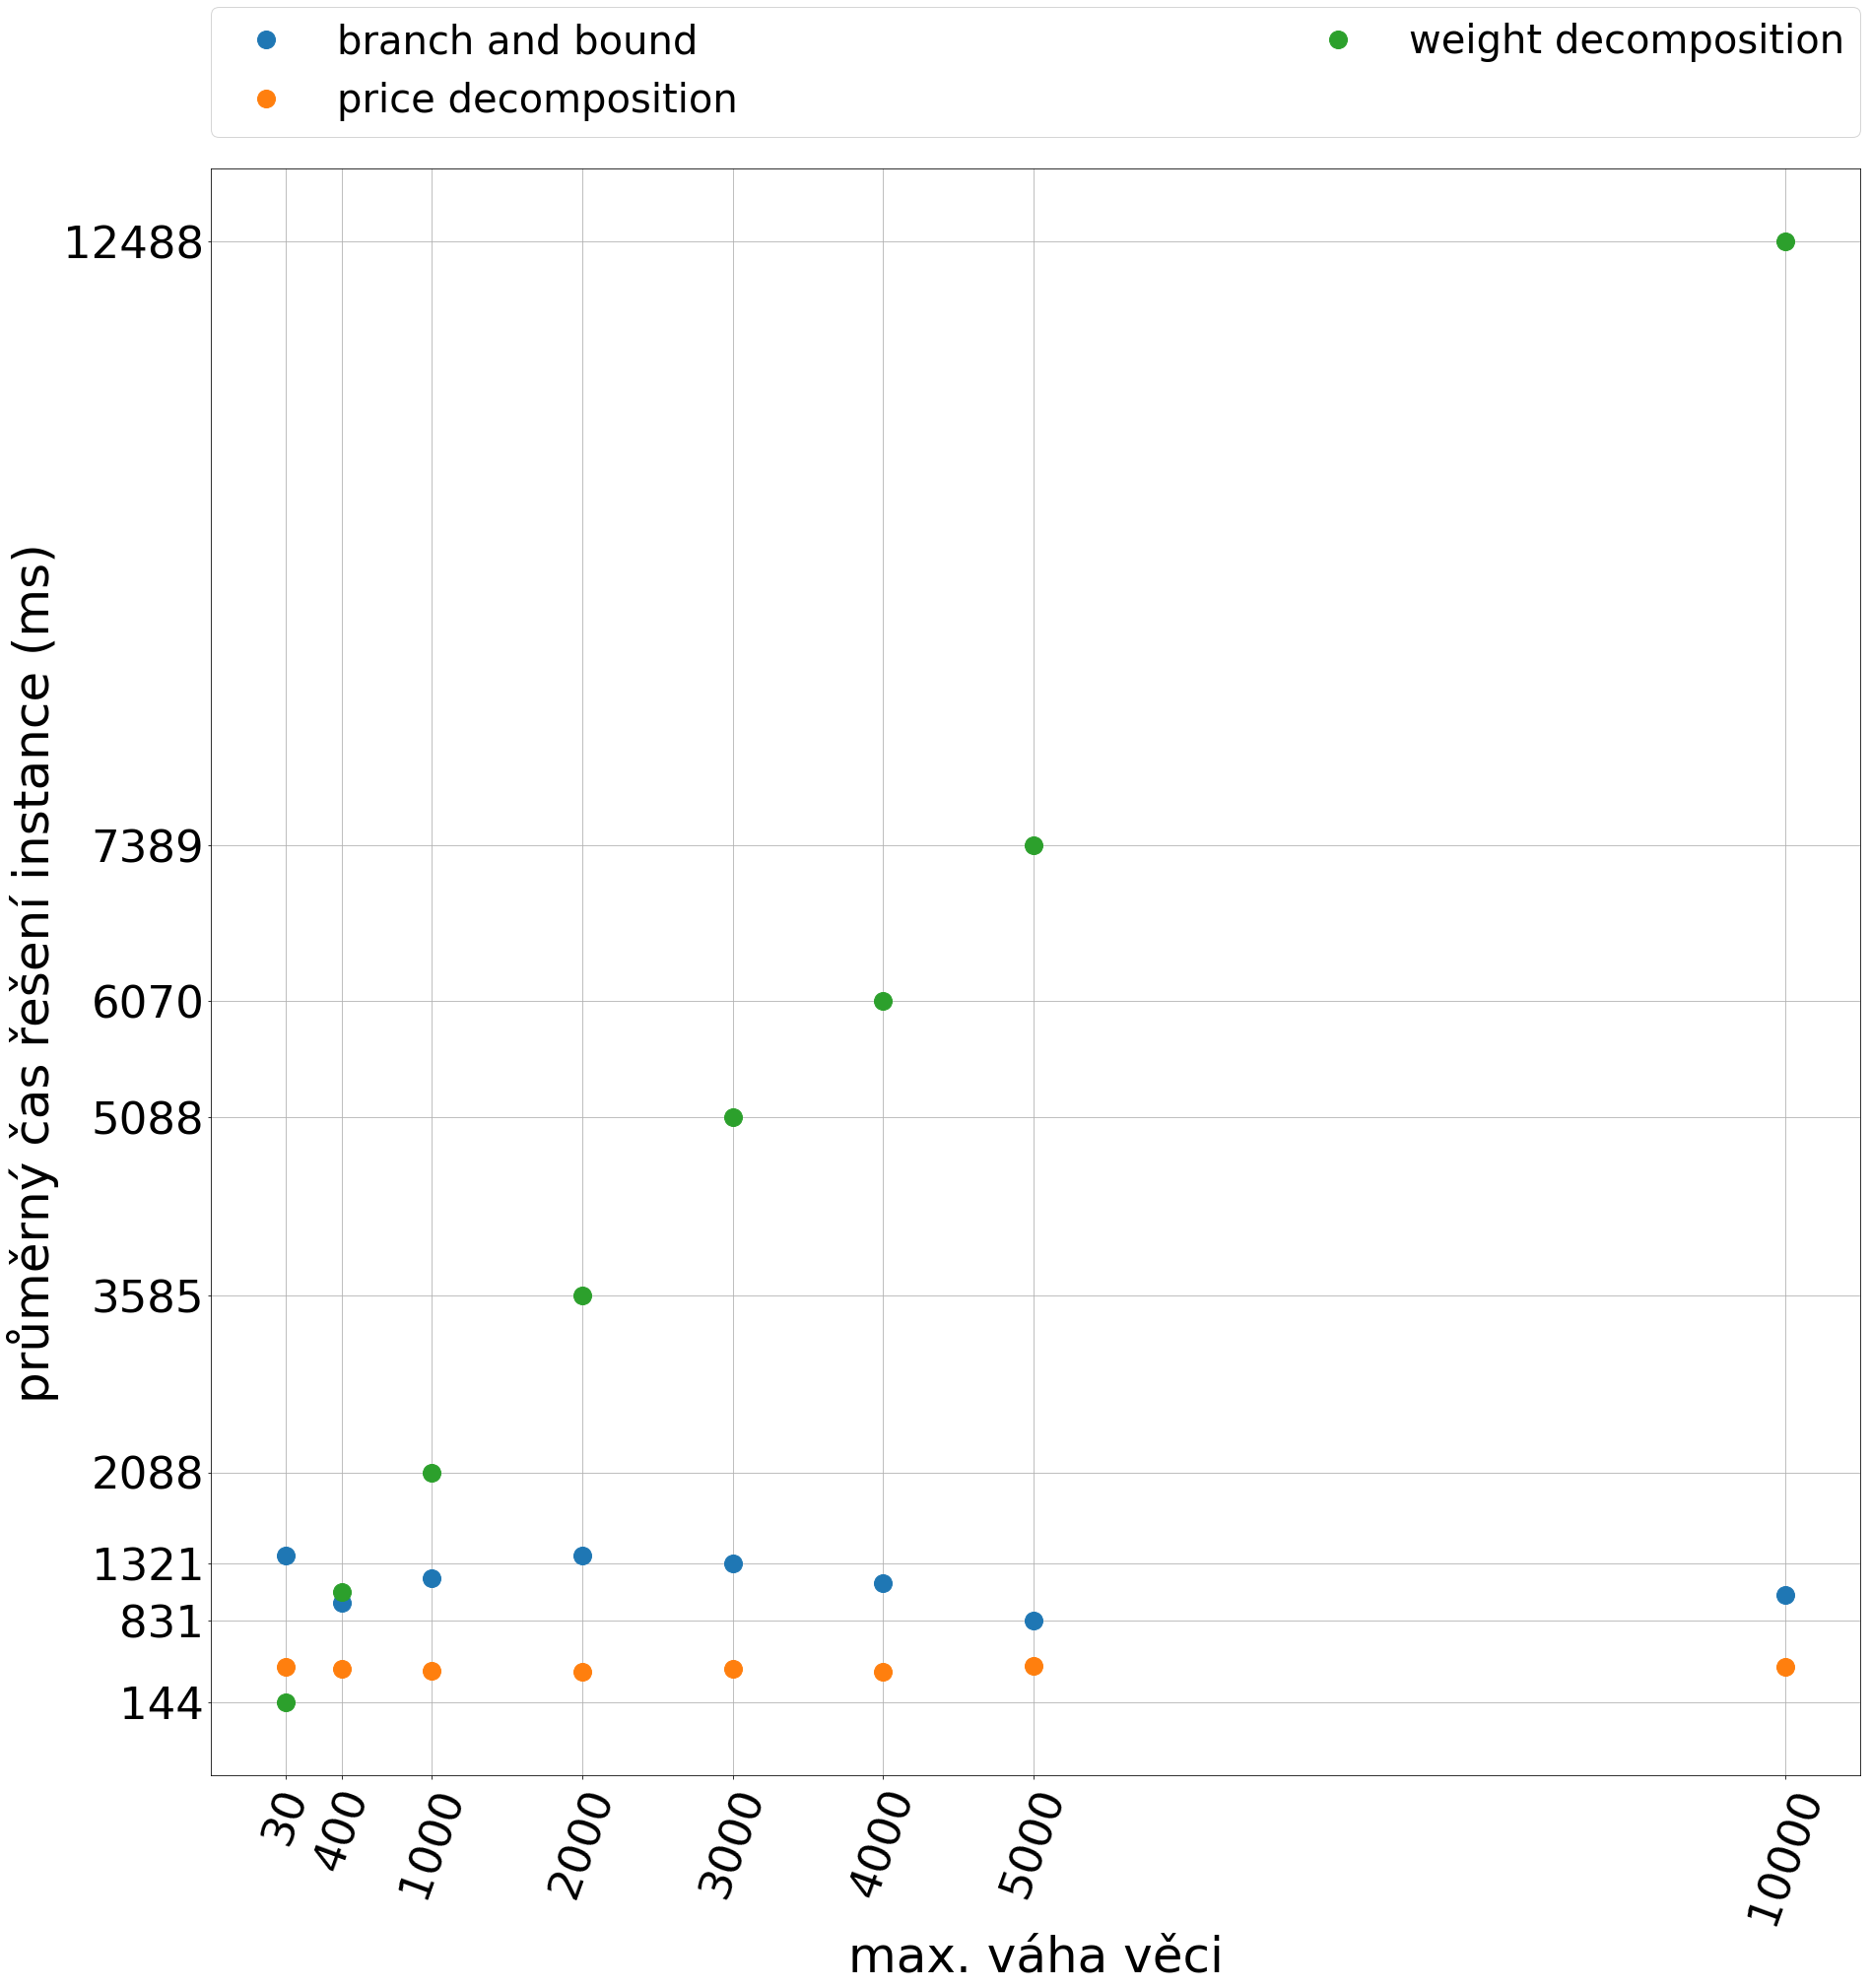

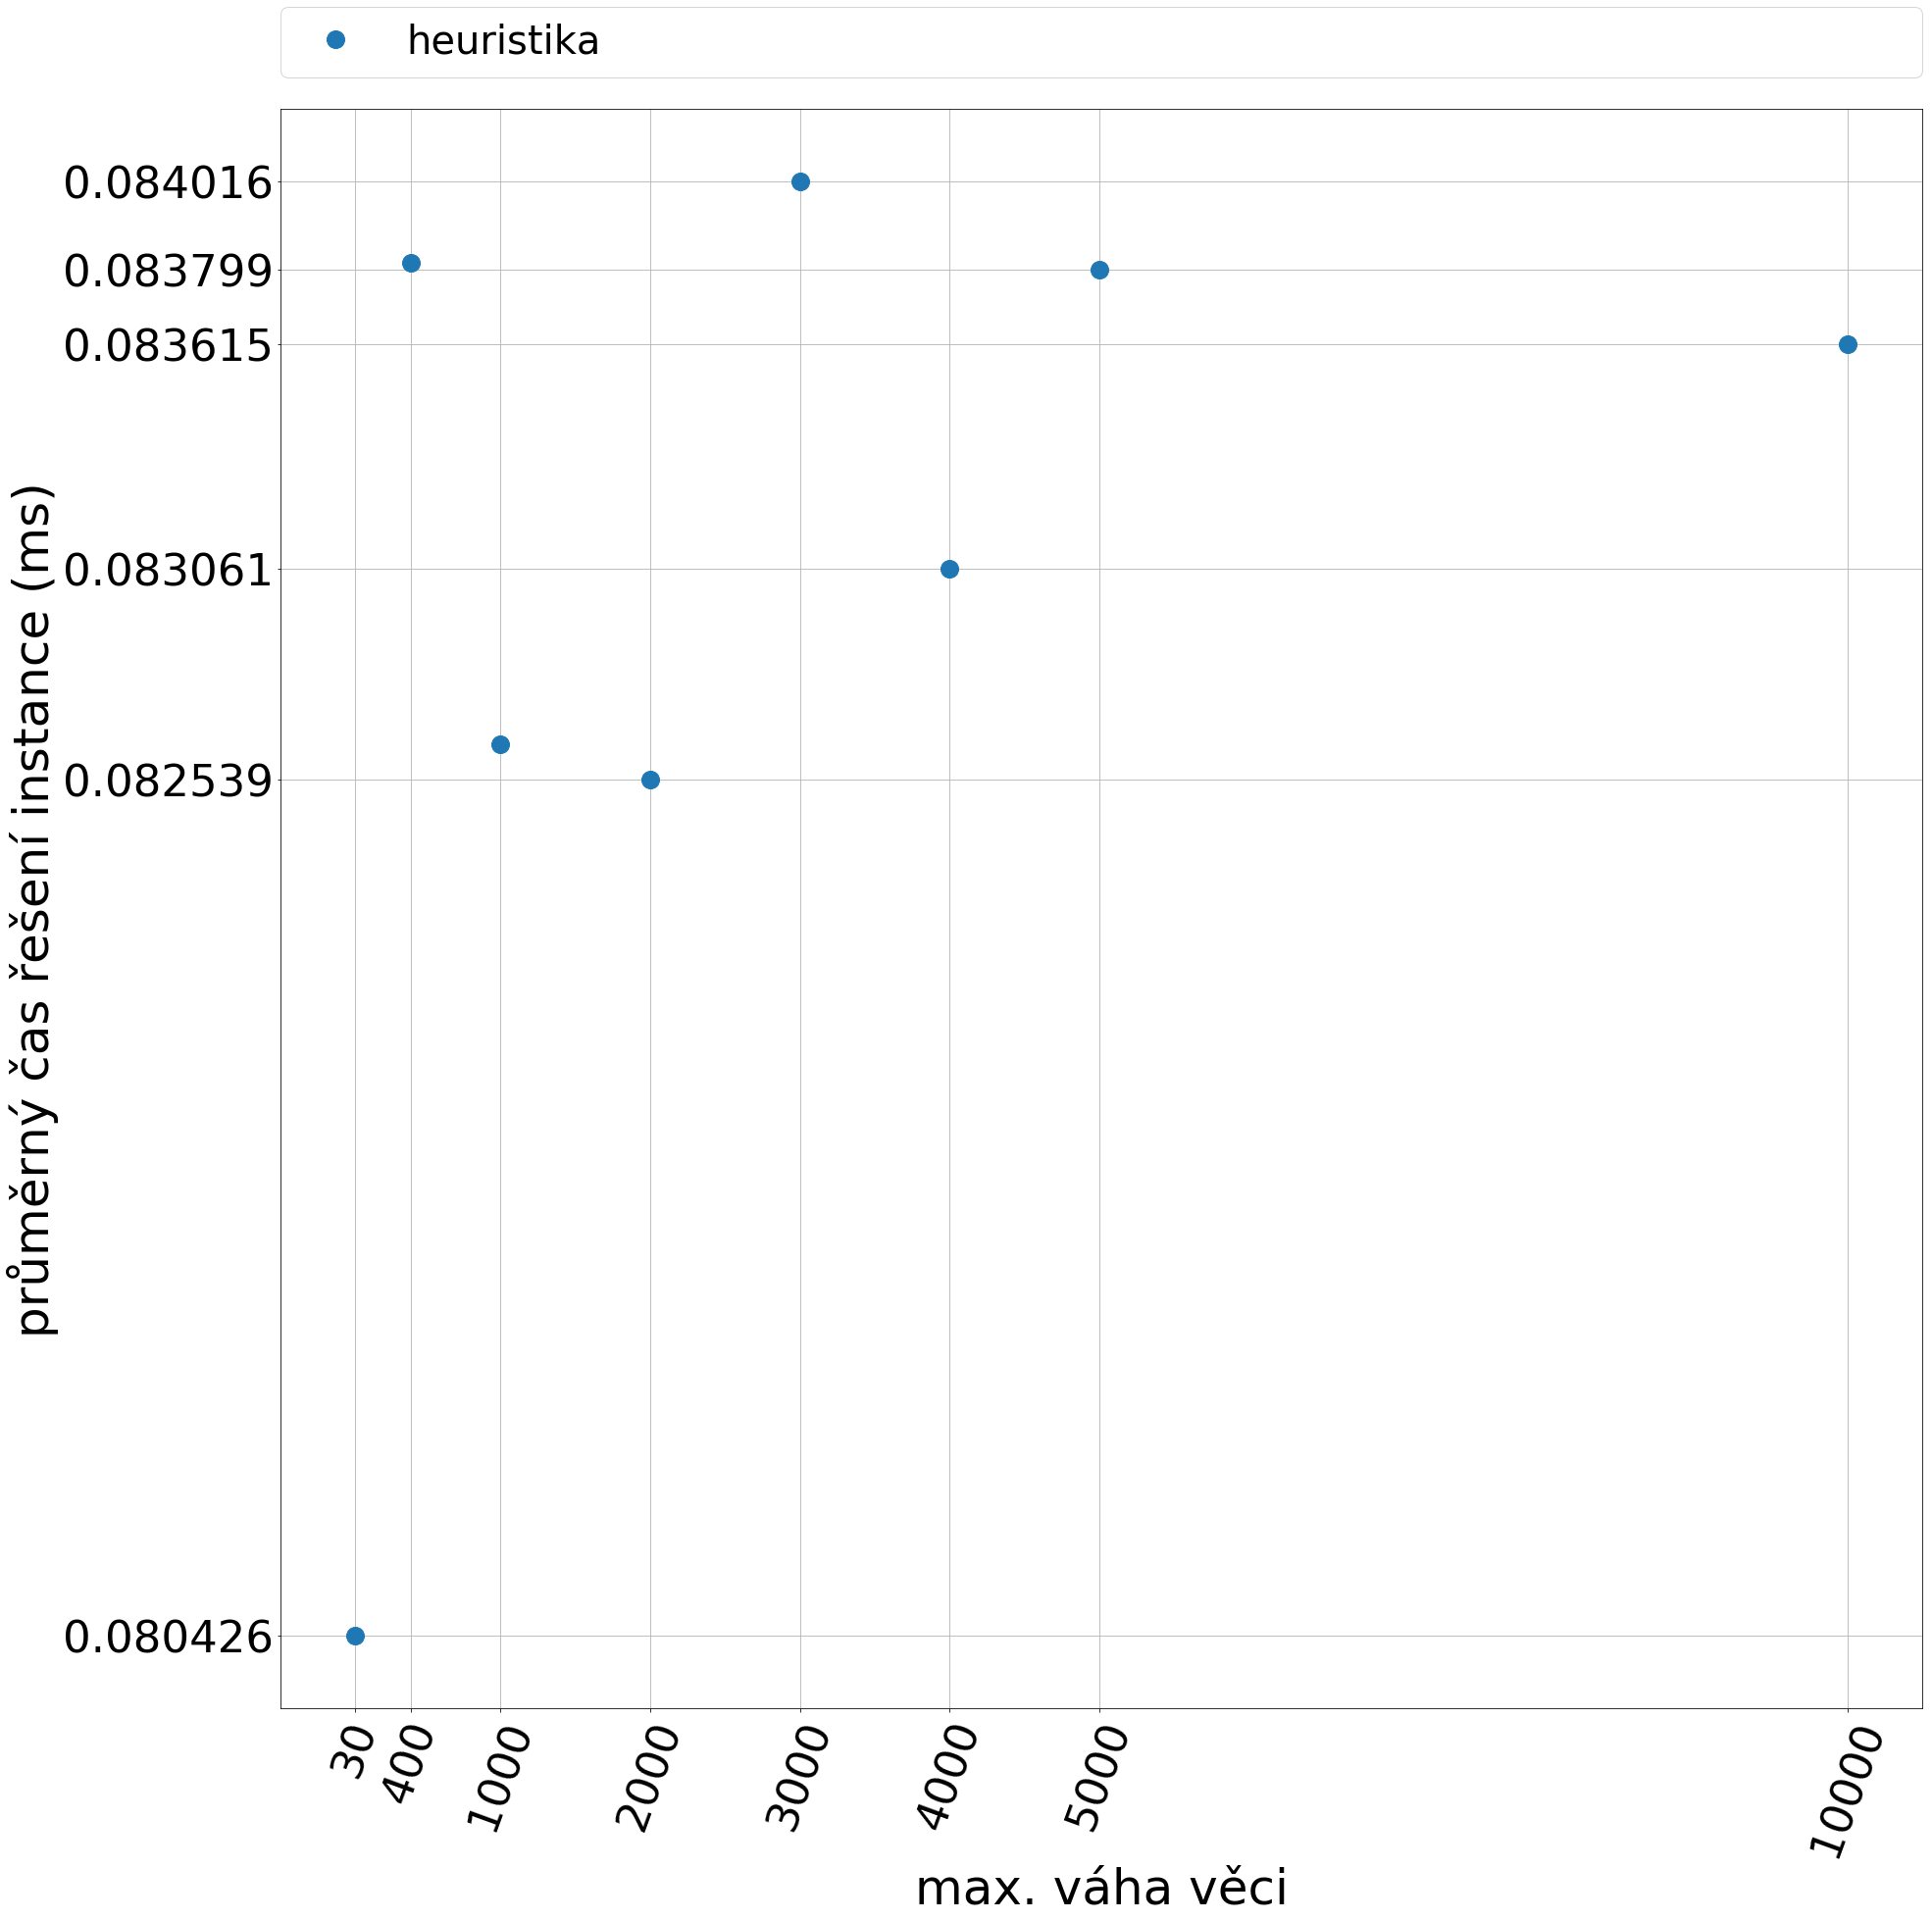

In [22]:
df = crate_data_frame(maxW,['tH', 'tBB', 'tDC', 'tDW'], 1)

do_plot(30, 30, df.index, df[['tBB', 'tDC', 'tDW']], 
        "max. váha věci", "průměrný čas řešení instance (ms)", ['branch and bound', 'price decomposition', 'weight decomposition'], 
        "WE.pdf", 30, 1)
do_plot(30, 30, df.index, df[['tH']], 
        "max. váha věci", "průměrný čas řešení instance (ms)", ['heuristika'], 
        "WH.pdf", 800, 1)

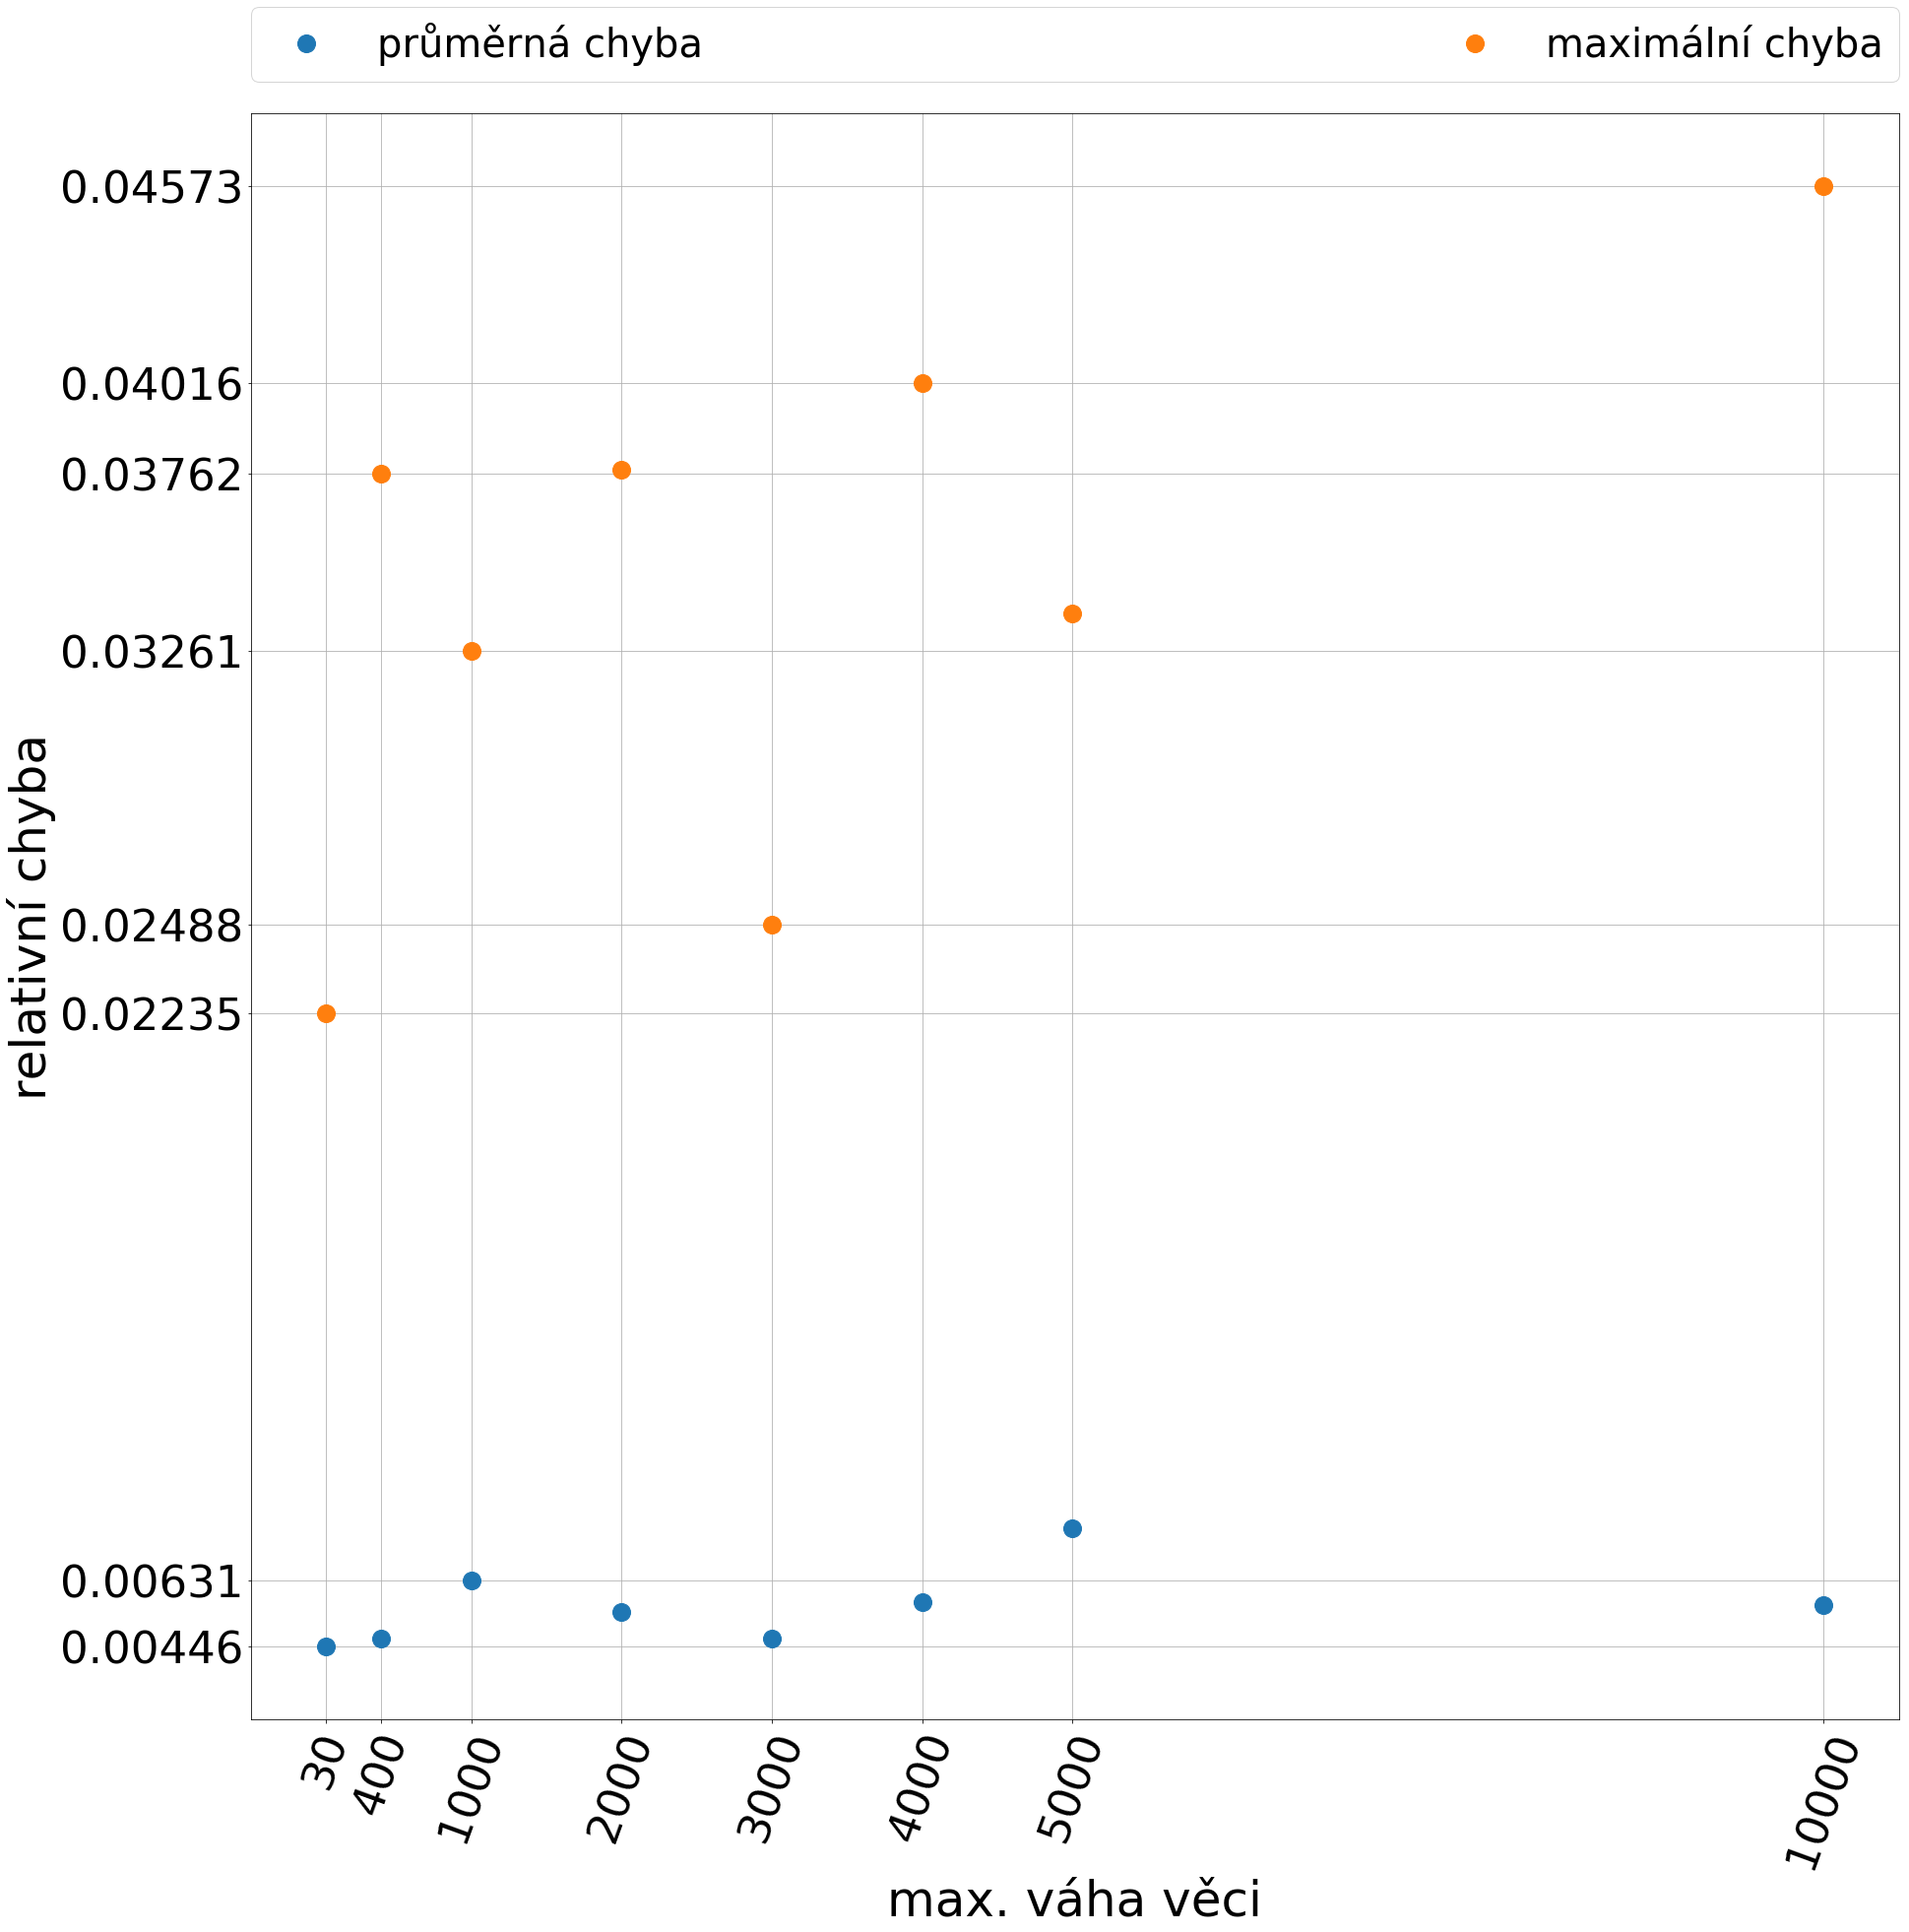

In [14]:
df = crate_data_frame(maxW,['errH'], 1, True)
dM = crate_data_frame(maxW,['errH'], 1, False)
df.columns = ['avgE']
dM.columns = ['maxE']
df['maxE'] = dM['maxE']


do_plot(30, 30, df.index, df[['avgE', 'maxE']], 
        "max. váha věci", "relativní chyba", ['průměrná chyba', 'maximální chyba'], 
        "WHE.pdf",30 , 1)

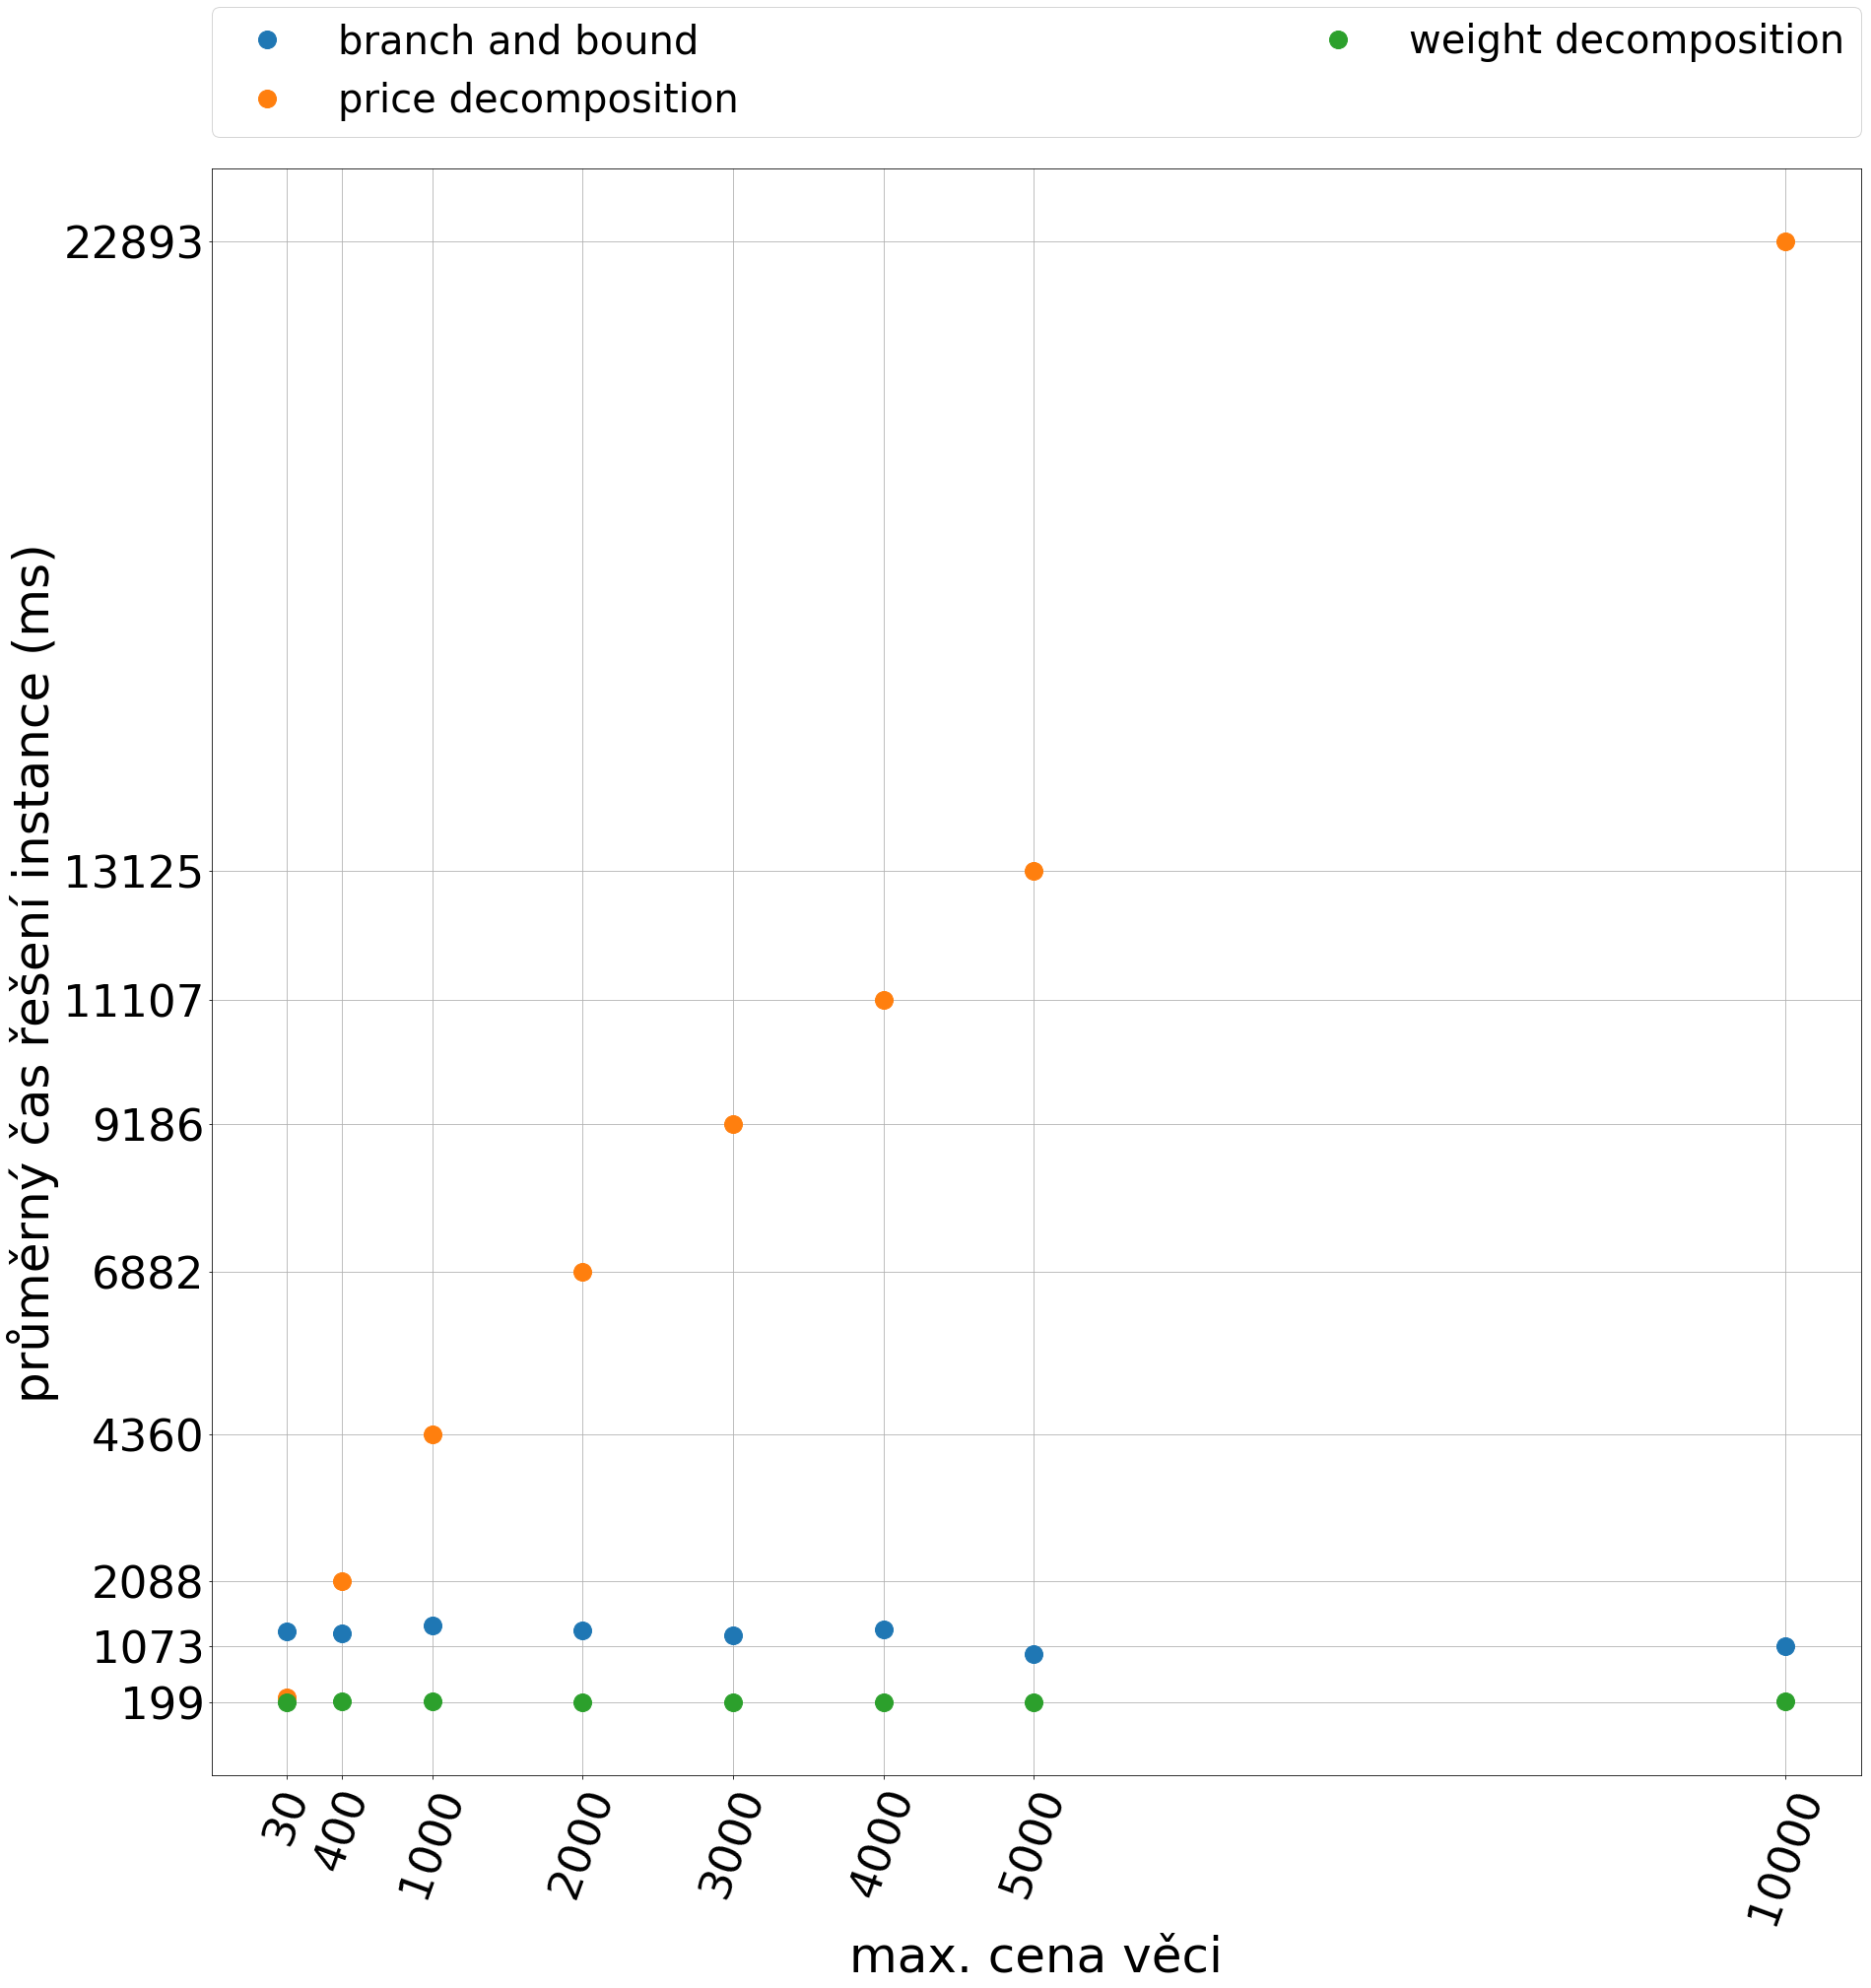

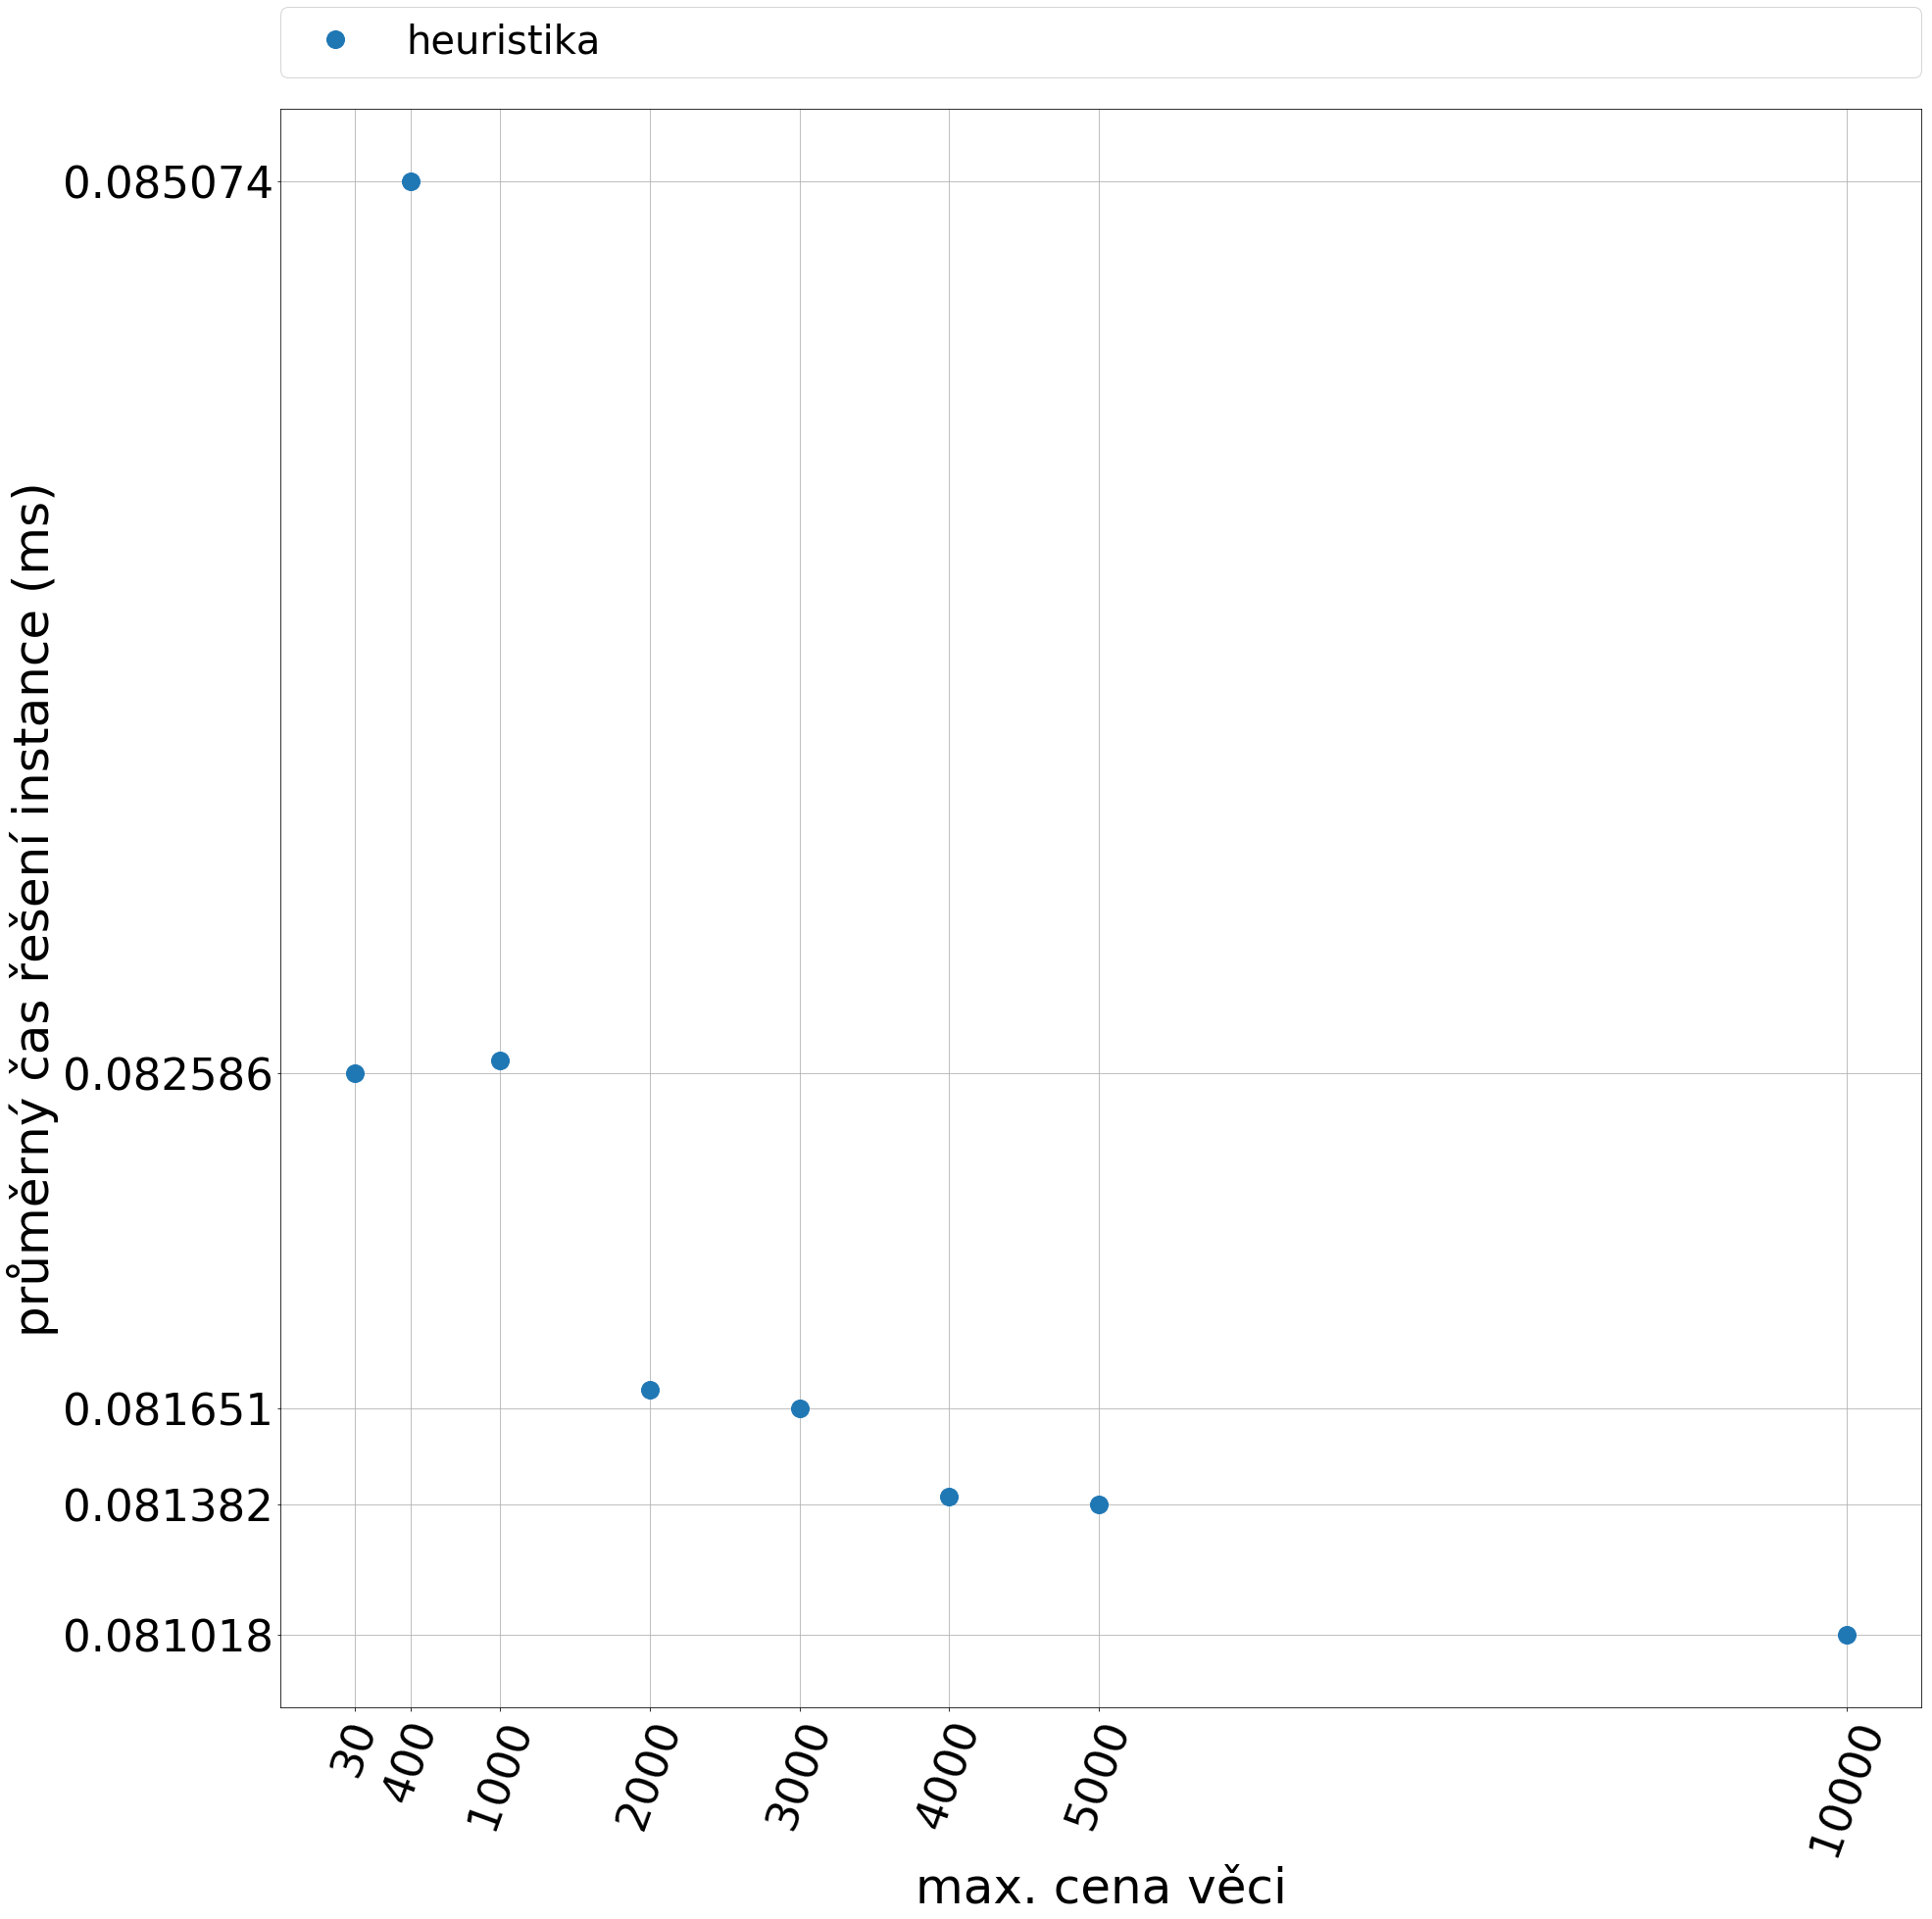

In [20]:
df = crate_data_frame(maxC,['tH', 'tBB', 'tDC', 'tDW'], 1)

do_plot(30, 30, df.index, df[['tBB', 'tDC', 'tDW']], 
        "max. cena věci", "průměrný čas řešení instance (ms)", ['branch and bound', 'price decomposition', 'weight decomposition'], 
        "CE.pdf", 30, 1)
do_plot(30, 30, df.index, df[['tH']], 
        "max. cena věci", "průměrný čas řešení instance (ms)", ['heuristika'], 
        "CH.pdf", 400, 1)

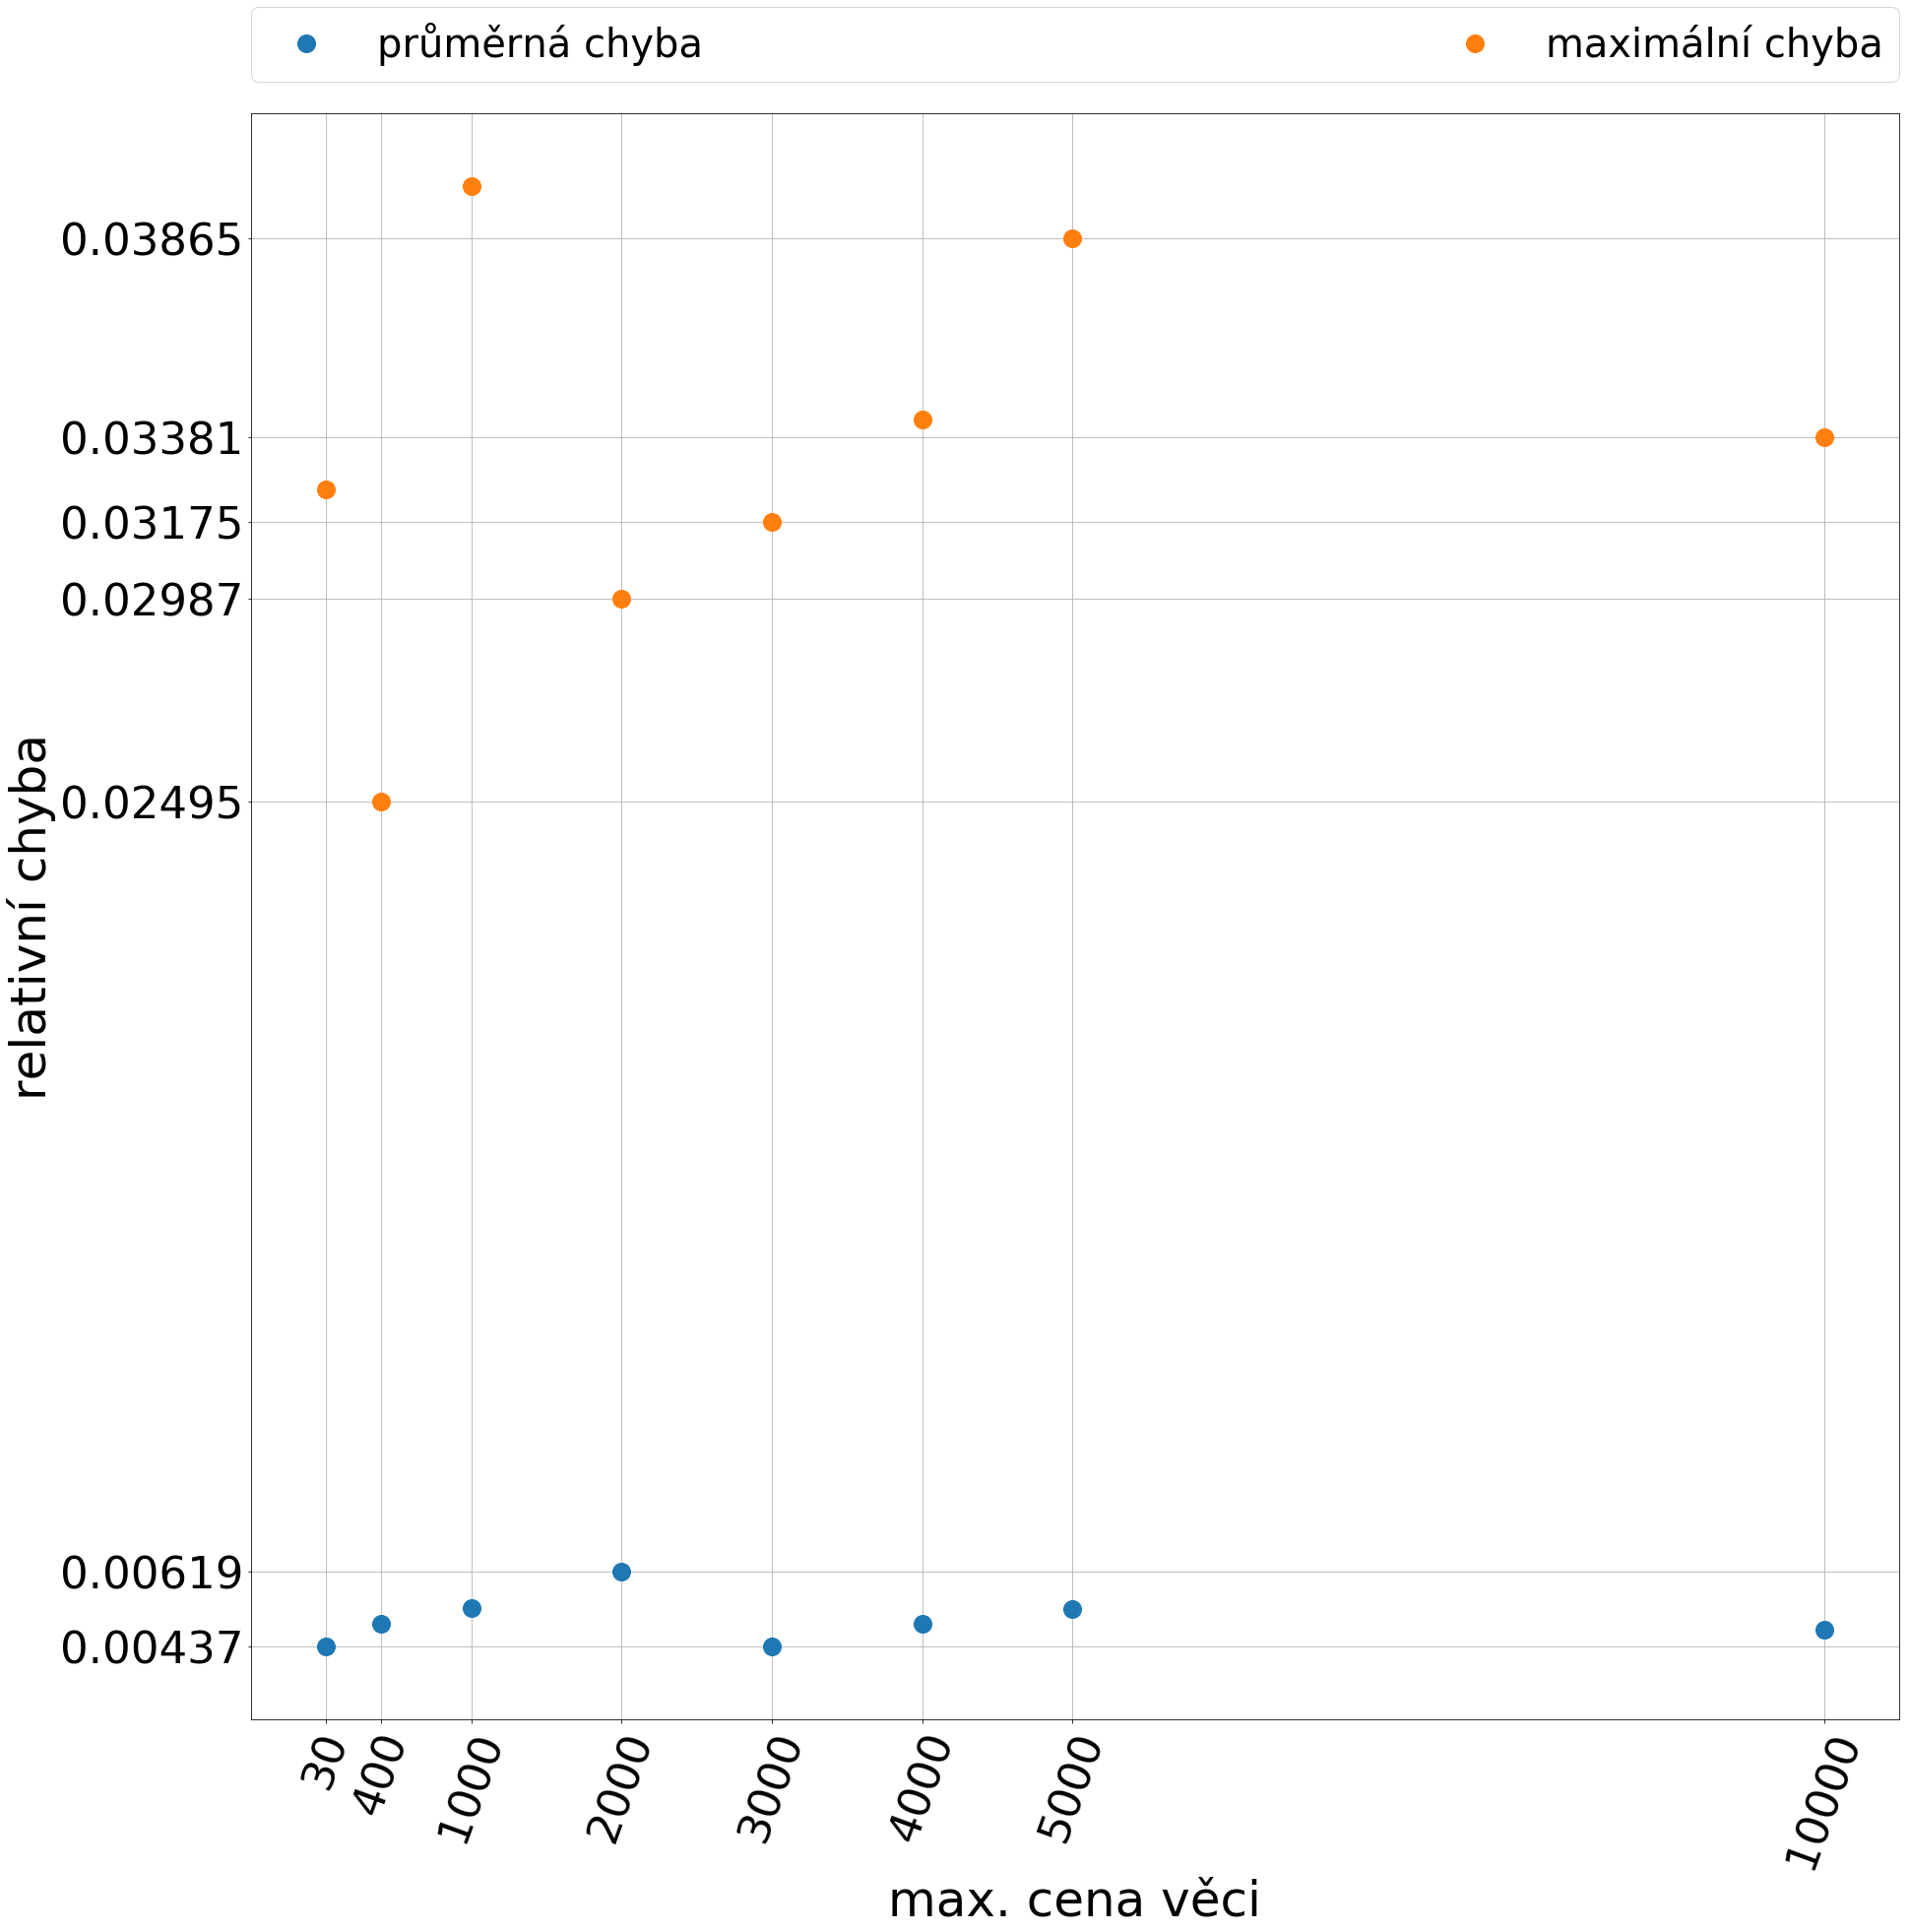

In [18]:
df = crate_data_frame(maxC,['errH'], 1, True)
dM = crate_data_frame(maxC,['errH'], 1, False)
df.columns = ['avgE']
dM.columns = ['maxE']
df['maxE'] = dM['maxE']


do_plot(30, 30, df.index, df[['avgE', 'maxE']], 
        "max. cena věci", "relativní chyba", ['průměrná chyba', 'maximální chyba'], 
        "CHE.pdf",30 , 1)